<!-- hide this cell if possible, latex macros -->
```{math}

\renewcommand{\Pr}{\mathrm{Pr}}
\renewcommand{\positive}{\checkmark}
\newcommand{\Binomial}{\mathrm{Binomial}}
\newcommand{\Beta}{\mathrm{Beta}}
\renewcommand{\B}{\mathrm{B}}
\newcommand{\Pynchon}{\mathrm{Pynchon}}
\newcommand{\distro}[1]{\text #1}
\newcommand{\E}[1]{\mathbb{E}{\text #1}}
\newcommand{\Var}[1]{\mathbb{Var}{\text #1}}
\newcommand{\and}{\ \mathrm{and}\ }
```

In [1]:
import matplotlib.pyplot as plt
plt.style.use("../styles/hda.mplstyle")

(chp-intro-probability)=
# Introduction to Probability


Probabilities are used in everyday speech to describe uncertain events and
degrees of belief about past and future states of affairs. A newspaper writer
might, for example, write about the likely outcome of an election held the
following day, or a student might talk about the their chance of having received
a passing score on a test they just completed. This chapter discusses the use of
probabilities in the context of one account of what it means to learn from
experience: Bayesian inference. <span class="index">Bayesian inference</span> provides both (1) an
interpretation of probabilities, and (2) a prescription for how to update
probabilities in light of evidence (i.e., how to learn from experience).  Both
these items are important. Treating <span class="index">probability</span> statements as statements about
degree of belief is useful whenever we need to communicate or compare our
judgment of the credibility of a hypothesis (or model) with the judgments of others,
something that happens all the time in the course of historical research. And
having a method of learning from evidence is important because it is useful to be able
to assess how evidence, in particular new evidence, supports or undermines theories.

The goal of this chapter is to illustrate Bayesian inference as applied to the
task of <span class="index">authorship attribution</span>.  The chapter begins with an informal discussion
of probabilities and Bayesian inference. A fictional case of authorship
attribution is used to prepare readers for a full treatment later in the
chapter. This introduction is followed by a formal characterization of
probabilities and <span class="index">Bayes's rule</span>. The introduction should leave readers familiar
with the basic vocabulary encountered in data analysis in the humanities and
allied social sciences. This formal introduction is followed by a return to the
task of authorship attribution. The bulk of the chapter is devoted to a detailed
case study examining the classic case of disputed authorship of several essays in <span class="index">*The Federalist Papers*</span>.

One note of warning: this chapter does not offer a complete introduction to probability. An appreciation of the material in this chapter requires some
familiarity with standard discrete probability distributions. This kind of familiarity is typically obtained in an introductory mathematics or statistics course devoted to probability.
We discuss appropriate preliminary readings at the end of this chapter.
For many kinds of humanities data, one specific discrete <span class="index">probability distribution</span>---one featured in this chapter---is of great importance: the <span class="index">negative binomial distribution</span>. Indeed,
facility with the negative binomial distribution counts as an essential skill
for anyone interested in modeling word frequencies in text documents.
The negative binomial distribution is the simplest probability distribution which provides a plausible model of word frequencies observed in English-language documents {cite:p}`church1995poisson`.
The only kinds of words which can be credibly modeled with more familiar distributions (e.g., normal, binomial, or Poisson) are those which are extremely frequent or vanishingly rare.

(sec-intro-probability-introduction)=
## Uncertainty and Thomas Pynchon

To motivate the Bayesian task of learning from evidence, consider the following
scenario. It has been suggested that [Thomas
Pynchon](https://en.wikipedia.org/wiki/Thomas_Pynchon), a well-known American
novelist, may have written under a pseudonym during his long career (e.g.,
{cite:t}`winslow2015fiction`). Suppose the probability of a work of literary fiction
published between 1960 and 2010 being written by Thomas Pynchon (under his own
name or under a pseudonym) is 0.001 percent, i.e., 1 in 100,000.  Suppose,
moreover, that a stylometric test exists which is able to identify a novel as
being written by Pynchon 90 percent of the time (i.e., the true positive
rate---"sensitivity" in some fields---equals 0.9). One percent of the time, however, the test mistakenly
attributes the work to Pynchon (i.e., the false positive rate equals
0.01). In this scenario, we assume the test works as described; we might imagine
Pynchon himself vouches for the accuracy of the test or that the test invariably
exhibits these properties over countless applications. Suppose a novel (written
by someone other than Pynchon) published in 2010 tests positive on the
stylometric test of Pynchon authorship. What is the probability that the novel
was penned by Pynchon?

One answer to this question is provided by Bayes's rule, which is given below and
whose justification will be addressed shortly:

<!-- using \checkmark instead of "positive" so things fit -->

\begin{equation}\label{eq:pynchon-bayes}
\Pr(\Pynchon|\positive) = \frac{\Pr(\positive|\Pynchon)\Pr(\Pynchon)}{\Pr(\positive|\Pynchon)\;\Pr(\Pynchon) + \Pr(\positive|\neg \Pynchon)\;( 1 - \Pr(\Pynchon) )}
\end{equation}

where $\positive$ indicates the event of the novel testing positive and $\Pynchon$ indicates the event of the novel having been written by Pynchon.
The preceding paragraph provides us with values for all the quantities on the
right-hand side of the equation, where we have used the expression $\Pr(A)$ to indicate
the probability of the event $A$ occurring.

In [2]:
pr_pynchon = 0.00001
pr_positive = 0.90
pr_false_positive = 0.01
print(pr_positive * pr_pynchon / (pr_positive * pr_pynchon +
                                  pr_false_positive * (1 - pr_pynchon)))

0.000899199712256092


<span class="index">Bayes' rule</span> produces the following answer: the probability that Pynchon is
indeed the author of the novel given a positive test is roughly one tenth of
one percent. While this is considerably higher than the baseline of one hundredth
of one percent, it seems underwhelming given the stated accuracy (90 percent)
of the test.

```{note}
  A less opaque rendering of this rule relies on the use of natural
  frequencies.  Ten out of every 1,000,000 novels published between 1960 and
  2010 are written by Pynchon. Of these 10 novels, 9 will test positive as
  Pynchon novels. Of the remaining 999,990 novels not written by Pynchon,
  approximately 10,000 will test positive as Pynchon novels. Suppose you have a
  small sample of novels which have tested positive, how many of the novels are
  actually written by Pynchon?  The answer is the ratio of true positives to
  total positives, or $9 / 10009 \approx 0.0009$, or 0.09 percent. So the
  conclusion is the same. Despite the positive test, the novel in question
  remains unlikely to be a Pynchon novel.
```

This example illustrates the essential features of Bayesian learning: we begin
with a <span class="index">*prior probability*</span>, a description of how likely a novel published
between 1960 and 2010 is a novel by Pynchon, and then update our belief in
light of evidence (a positive test result using a stylometric test), and arrive
at a new <span class="index">*posterior probability*</span>. While we have yet to address the question of
why the use of this *particular* procedure---with its requirement that degree
of belief be expressed as probabilities between 0 and 1---deserves deference,
we now have at least a rudimentary sense about what Bayesian learning involves.

This extended motivating example prepares us for the case study at the center of this
chapter: the disputed authorship of several historically significant essays by two signers
of the United States Constitution: Alexander Hamilton and James Madison. That this case
study involves, after Roberto Busa's encounters with Thomas Watson, the best known
instance of humanities computing *avant la lettre* will do no harm either. The case study
will, we hope, make abundantly clear the challenge Bayesian inference addresses: the
challenge of describing---to at least ourselves and potentially to other students or
researchers---*how observing a piece of evidence changes our prior beliefs*.

(sec-intro-probability-probability)=
## Probability

This section provides a formal introduction to probabilities and their role in
Bayesian inference. Probabilities are the lingua franca of the contemporary
natural and social sciences; their use is not without precedent in the
humanities research either, as the case study in this chapter illustrates.
Authorship attribution is a fitting site for an introduction to using
probabilities in historical research because the task of authorship attribution
has established contours and involves using probabilities to describe beliefs
about events in the distant past---something more typical of historical
research than other research involving the use of probabilities.

Probabilities are numbers between 0 and 1. For our purposes---and in Bayesian
treatments of probability generally---probabilities express <span class="index">degree of
belief</span>. For example, a climatologist would use a probability (or a distribution
over probabilities) to express their degree of belief in the hypothesis that the
peak temperature in Germany next year will be higher than the previous year. If
one researcher assigns a higher probability to the hypothesis than another
researcher, we say that the first researcher finds (or tends to find) the
hypothesis more *credible*, just as we would likely say in a less formal
discussion.

For concreteness, we will anchor our discussion of probabilities (degrees of
belief) in a specific case. We will discuss probabilities that have been
expressed by scholars working on a case of disputed authorship. In
1964, <span class="index">Frederick Mosteller</span> (1916–2006) and <span class="index">David Wallace</span> (1928–2017) investigated the authorship of twelve
disputed essays which had been published under a pseudonym in New York
newspapers between 1787 and 1788. The dispute was between two figures well-known in
the history of the colonization of North America by European settlers: Alexander Hamilton and James
Madison. Each claimed to be the sole author of all twelve essays. These twelve essays
were part of a larger body of eightyfive essays known collectively as <span class="index">*The Federalist Papers*</span>.
The essays advocated ratification of the United States Constitution. In
the conclusion of their study, Mosteller and Wallace offer probabilities to
describe their degrees of belief about the authorship of each of the twelve
essays. For example, they report that the probability Federalist No. 62 is
written by Madison is greater than 99.9 percent (odds of 300,000 to 1) while the
probability Federalist No. 55 is written by Madison is 99 percent (100 to 1). In
the present context, it is useful to see how Mosteller expresses their
conclusion: "Madison is extremely likely, in the sense of degree of belief, to
have written the disputed *Federalist* essays, with the possible exception of
No. 55, and there our evidence is weak; suitable deflated odds are 100 to 1 for
Madison" ({cite:t}`mosteller1987statistical`, 139).

It should now be clear what probabilities are.  It may not, however, be
entirely clear what problem the *quantitative* description of degree of belief
solves. What need is there, for example, to say that I believe that it will
rain tomorrow with probability 0.8 when I might just as well say, "I believe it
will likely rain tomorrow"? Or, to tie this remark to the present case, what is
gained by saying that Madison is very likely the author of Federalist No. 62
versus saying that the odds favoring Madison's authorship of the essay is
300,000 to 1? Those suspicious of quantification *tout court* might consider
the following context as justification for using numbers to make fine
distinctions about degrees of belief.  In modern societies, we are familiar
with occasions where one differentiates between various degrees of belief. The
legal system provides a convenient source of examples. Whether you are familiar
with judicial proceedings in a territory making use of a legal system in the
common law tradition (e.g., United States) or a legal system in the civil law
tradition (e.g., France), the idea that evidence supporting conviction must
rise to a certain *level* should be familiar {cite:p}`clermont2002comparative`.  If
you are called to serve on a citizen jury (in a common law system) or called to
arbitrate a dispute as a judge (in a civil law system), it is likely not
sufficient to *suspect* that, say, Jessie stole Riley's bike; you will likely
be asked to assess whether you are convinced that Jessie stole Riley's bike
"beyond a reasonable doubt".  Another classic example of a case where making
fine gradations between degrees of belief would be useful involves the decision
to purchase an insurance contract (e.g., travel insurance). An informed decision requires balancing (1)
the cost of the insurance contract, (2) the cost arising if the event
insured against comes to pass, and (3) the probability that the event will occur.


```{note}
Consistent discussion of probabilities in ordinary language is sufficiently
challenging that there are attempts to standardize the terminology. Consider,
for example, the [Intergovernmental Panel on Climate Change's guidance on
addressing
uncertainties](http://www.ipcc.ch/pdf/supporting-material/uncertainty-guidance-note.pdf):

| Term                   | Likelihood of the outcome | Odds           | Log odds |
|------------------------|---------------------------|----------------|----------|
| Virtually certain      | > 99% probability         | > 99 (or 99:1) | > 4.6    |
| Very likely            | > 90% probability         | > 9            | > 2.2    |
| Likely                 | > 66% probability         | > 2            | > 0.7    |
| About as likely as not | 33 to 66% probability     | 0.5 to 2       | 0 to 0.7 |
| Unlikely               | < 33% probability         | < 0.5          | < -0.7   |
| Very unlikely          | < 10% probability         | < 0.1          | < -2.2   |
| Exceptionally unlikely | < 1% probability          | < 0.01         | < -4.6   |
```


(sec-intro-probability-degree-of-belief)=
### Probability and degree of belief

Probabilities are one among many ways of expressing degrees of belief using numbers.
(Forms of the words "plausibility" and "credibility" will also be used to refer
to "<span class="index">degree of belief</span>".) Are they a particularly good way? That is, do
probabilities deserve their status as the canonical means of expressing degrees
of belief? Their characteristic scale (0 to 1) has, at first glance, nothing to
recommend it over alternative continuous scales (e.g., -2 to 2, 1 to 5, or
$-\infty$ to $\infty$). Why should we constrain ourselves to this scale when we
might prefer our own particular---and perhaps more personally
familiar---scale? Presently, reviewing products (books,
movies, restaurants, hotels, etc.) in terms of a scale of 1 to 5 "stars" is
extremely common. A scale of 0 to 1 is rarely used.

A little reflection will show that the scale used by probabilities has a few
mathematical properties that align well with a set of minimal requirements for
deliberation involving degrees of belief. For example, the existence of a lower
bound, $0$, is consistent with the idea that, if we believe an event is
impossible (e.g., an event which has already failed to occur), there can be
no event in which we have a lower degree of belief. Similarly, the
existence of an upper bound, $1$, is consistent with the assumption that if we
believe an event is certain (e.g., an event which has already occurred), there
can be no event which is more plausible. Any bounded interval has this
property; other intervals, such as zero to infinity, open
intervals, or the natural numbers, do not.

```{margin}
Formally the
axioms of beliefs are more general than the axioms of probability. If, however,
you use the axioms of beliefs and a 0 to 1 scale, you satisfy both the axioms
of beliefs and the axioms of probability ({cite:t}`hoff2009first`, 13--14).
```
The use of probabilities is also associated with a minimal set of rules, the
"<span class="index">axioms of belief</span>" or the "<span class="index">axioms of probability</span>", which must be followed when
considering the aggregate probability of the conjunction or disjunction of
events ({cite:t}`hoff2009first`, 13--14; {cite:t}`casella2001statistical`, 7--10). (The conjunction of events A and B is often expressed as "A or B", the disjunction as "A and B".)
These rules are often used to derive other rules. For example, from the rule that all probabilities must be between 0 and 1, we can conclude that the probability of an aggregate event $C$ that either event $A$ occurs or
event $B$ occurs (often written as $C = A \cup B$, where $\cup$ denotes the
union of elements in two sets) must also lie between 0 and 1.

<!-- NOTE: this aside is a pre-emptive response to concerns about quantitative
reasoning often encountered among individuals who have spent time in
departments affiliated with the humanities in the United States in the late
20th and early 21st century. -->

```{note}
The <span class="index">axioms of probability</span>, despite the appearance of the superficially
demanding term "axiom", only minimally constrain deliberations about events.
Adhering to them is neither a mark of individual nor general obedience to a
broader (universalizing) set of epistemological dispositions (e.g.,
"rationality"). The axioms demand very little. They demand, in essence, that
we be willing to both bound and order our degrees of belief. They do not say
anything about what our initial beliefs should be.  If we are uncomfortable
with, for example, ever saying ourselves (or entertaining someone else's
saying) that one event is more likely than another event (e.g., it is more
likely that the writer of *The Merchant of Venice* was human than non-human),
then the use of probabilities will have to proceed, if it proceeds at all, as
a thought experiment. (A pessimistic view of the history of scientific claims
of knowledge might figure in such a refusal to compare or talk in terms of
degrees of belief.) Such a thought experiment would, however, find ample
pragmatic justification: observational evidence and testimony in favor of the
utility of probabilities is found in a range of practical endeavours, such as
engineering, urban planning, and environmental science. And we
need not explicitly endorse the axioms of probability in order to use them or
to recommend their use.
```


```{margin}
[Grinstead and Snell's Introduction to
Probability](https://math.dartmouth.edu/~prob/prob/prob.pdf) is excellent and freely 
    available online. 
```
When we use probabilities to represent degrees of belief, we use the following standard
notation. The degree of belief that an event $A$ occurs is $\Pr(A)$. Events may be
aggregated by conjunction or disjunction: $A \textrm{ or } B$ is itself an event, as is $A
\textrm{ and } B$. The degree of belief that $A$ occurs given that event $B$ has already
occurred is written $\Pr(A|B)$. For a formal definition of "event" in this setting and a
thorough treatment of probability, readers are encouraged to consult a text dedicated to
probability, such as {cite:t}`grinstead2012introduction` or
{cite:t}`hacking2001introduction`.

```{margin}
The axioms of
beliefs are satisfied, with very minor adjustments, by $\Pr$, considered as a
belief function, which respects the axioms of probability. Interested readers
are encouraged to review {cite:t}`jaynes2003probability` or {cite:t}`kadane2011principles`.
```
Using this notation we can state the <span class="index">axioms of probability</span>:

1. $0 \le \Pr(A) \le 1$.
2. $\Pr(A \textrm{ or } B) = \Pr(A) + \Pr(B)$ if $A$ and $B$ are mutually exclusive events.
3. $\Pr(A \textrm{ and } B) = \Pr(B) \Pr(A|B)$.

```{margin}
E. T. Jaynes quotes
Laplace approvingly, "Probability theory is nothing but common sense reduced to
calculation" ({cite:t}`jaynes2003probability`, 24).
```
Each of these axioms can be translated into reasonable constraints on the ways
in which we are allowed to describe our degrees of belief. An argument for axiom 1 has been
offered above. Axiom 2 implies that our degree of belief that one event in a
collection of possible events will occur should not decrease if the set of
possible events expands. (My degree of belief in rain occurring tomorrow must be less than or equal to my belief rain *or* snow will occur tomorrow.)
Axiom 3 requires that the probability of a complex
event be calculable when the event is decomposed into component "parts". The
rough idea is this: we should be free to reason about the probability of $A$
and $B$ both occurring by first considering the probability that $B$ occurs and
then considering the probability that $A$ occurs given that $B$ has occurred.

From the axioms of probability follows a rule, <span class="index">Bayes's rule</span>, which delivers a method of
learning from observation. Bayes's rule offers us a useful
prescription for how our degree of belief in a hypothesis should change
(or "update") after we observe evidence bearing on the hypothesis. For example, we
can use Bayes's rule to calculate how our belief that Madison is the author of
Federalist No. 51 (a hypothesis) should change after observing the number of
times the word *upon* occurs in No. 51 (evidence). (*Upon* occurs much more
reliably in Hamilton's previous writings than in Madison's.)

<span class="index">Bayes's rule</span> is remarkably general. If we can describe our *prior* belief about a
hypothesis $H$ as $\Pr(H)$ (e.g., the hypothesis that Madison is the author of
Federalist No. 51, $\Pr(\textrm{Madison})$), and describe how likely it would
be to observe a piece of evidence $E$ given that the hypothesis holds,
$\Pr(E|H)$ (e.g., the likelihood of observing *upon* given the hypothesis of
Madison's authorship, $\Pr(\textrm{upon}|\textrm{Madison})$), Bayes's rule tells
us how to "update" our beliefs about the hypothesis to arrive at our *posterior*
degree of belief in the hypothesis, $\Pr(H|E)$
(e.g., $\Pr(\textrm{Madison}|\textrm{upon})$), in the event that we indeed observe
the specified piece of evidence. Formally, in a situation where there are $K$
competing hypotheses, Bayes' rule reads as follows,

\begin{equation}\label{eq:bayes-rule}
\Pr(H_k|E) = \frac{\Pr(E|H_k)\Pr(H_k)}{\sum_{j=1}^K \Pr(E|H_j)\Pr(H_j)},
\end{equation}

where $\Pr(H_k|E)$ is the probability of hypothesis $k$ ($H_k \in \mathcal{H}$) given that
evidence $E$ is observed. Here we assume that the hypotheses are mutually exclusive and
exhaust the space of possible hypotheses. In symbols we would write that the hypotheses
$H_k, k = 1, \ldots, K$ partition the hypothesis space: $\cup_{k=1}^K H_k = \mathcal{H}$
and $\cap_{k=1}^K H_k = \emptyset$. Bayes' rule follows from the axioms of probability. A
derivation of <span class="index">Bayes' rule</span> is provided in an appendix to this
chapter (Appendix {ref}`appendix-intro-probability-bayes-rule`). A fuller appreciation of
Bayes's rule may be gained by considering its application to questions (that is,
hypotheses) of interest. We turn to this task in the next section.

(sec-intro-probability-bayes-rule-authorship-attribution)=
## Example: Bayes's Rule and Authorship Attribution

In the case of authorship attribution of the disputed essays in *The Federalist Papers*, the
space of hypotheses $\mathcal{H}$ is easy to reason about: a disputed essay is
written either by Hamilton or by Madison.  There is also not much difficulty in
settling on an initial "prior" hypothesis: the author of a disputed
*Federalist* essay---we should be indifferent to the particular (disputed)
essay---is as likely to be Hamilton as it is to be Madison. That is, the
probability that a disputed essay is written by Hamilton (prior to observing
any information about the essay) is equal to 0.5, the same probability which we
would associate with the probability that the disputed essay is written by
Madison. In symbols, if we use $H$ to indicate the event of Hamilton being the
author then $\{ H, \neg H\}$ partitions the space of possible hypotheses.
$\Pr(H) = \Pr(\neg H) = 0.5$ expresses our initial indifference between the
hypothesis that Hamilton is the author and the hypothesis that Madison (i.e.,
not Hamilton) is the author.

For this example, the evidence, given a hypothesis about the author, is the
presence or absence of one or more occurrences of the word *upon* in the essay.
This word is among several words which Mosteller and Wallace identify as both
having a distinctive pattern in the essays of known authorship and being the
kind of frequent "function" word widely accepted as having no strong connection
between the subject matter addressed by a piece of writing. These <span class="index">function words</span>
are considered as promising subject-independent markers of authorial
"style" (chapter {ref}`chp:stylometry` delves deeper into the added value of
function words in authorship studies). The code blocks below will construct a
table describing the frequency with which *upon* occurs across 51 essays by
Hamilton and 36 essays by Madison.

```{note}
The dataset used here includes all the
disputed essays, all the essays in *The Federalist Papers*, and a number of additional
(non-disputed) essays. Seventy-seven essays in *The Federalist Papers* were published in *The Independent
Journal* and *the New York Packet* between October 1787 and August 1788.  Twelve
essays are disputed. John Jay wrote 5 essays, Hamilton wrote 43 essays, and
Madison wrote 14 essays. Three essays were jointly written by Hamilton and
Madison; their authorship is not disputed ({cite:t}`mosteller1987statistical`,
132). Additional essays (also grouped under the heading of *The Federalist Papers*)
were published by Hamilton after the 77 serialized essays. In order to
have a better sense of the variability in Madison's style, additional essays by
Madison from the period were included in the analysis. The dataset used here
includes all these essays. A flawless reproduction of the dataset from the
original sources that Mosteller and Wallace used does not yet exist. Creating
one would be an invaluable service.
```

The first code block introduces *The Federalist Papers* essays' word frequencies,
stored in a CSV file ``federalist-papers.csv``, by randomly sampling several
essays (using ``DataFrame``'s <span class="index">``sample()``</span> method) and displaying the frequency
of several familiar words. The dataset containing the word frequencies is
organized in a traditional manner with each row corresponding to an essay and
the columns named after (lower cased) elements in the vocabulary.

In [3]:
import pandas as pd
import numpy as np; np.random.seed(1)  # fix a seed for reproducible random sampling

# only show counts for these words:
words_of_interest = ['upon', 'the', 'state', 'enough', 'while']
df = pd.read_csv('data/federalist-papers.csv', index_col=0)
df[words_of_interest].sample(6)

upon  the  state  enough  while
68     2  142     10       0      0
36     6  251     25       0      0
74     3  104      2       0      0
63     0  290      6       0      0
40     0  294      6       0      0
54     2  204     16       0      0

In order to show the frequency of *upon* in essays with known authors we first
verify that the dataset aligns with our expectations. Are there, as we
anticipate, twelve disputed essays? The dataset includes a column with the name
"AUTHOR" which records received opinion about the authorship of the essays
(that is, before Mosteller and Wallace's research). We can identify the rows
associated with disputed essays by finding those rows whose ``AUTHOR`` is
"HAMILTON OR MADISON" (i.e., disputed):

In [4]:
# values associated with the column 'AUTHOR' are one of the following:
# {'HAMILTON', 'MADISON', 'JAY', 'HAMILTON OR MADISON',
#  'HAMILTON AND MADISON'}
# essays with the author 'HAMILTON OR MADISON' are the 12 disputed essays.
disputed_essays = df[df['AUTHOR'] == 'HAMILTON OR MADISON'].index
assert len(disputed_essays) == 12  # there are twelve disputed essays
# numbers widely used to identify the essays
assert set(disputed_essays) == {49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63}

Now we gather texts where authorship is known by locating rows in our dataset
where the value associated with the "AUTHOR" column is either "HAMILTON" or
"MADISON" (indicating exclusive authorship). We make use of the <span class="index">``Series.isin()``</span> method
to identify which elements in a ``Series`` are members of a provided
sequence. The ``isin()`` method returns a new ``Series`` of ``True`` and ``False``
values.

In [5]:
# gather essays with known authorship: the undisputed essays of
# Madison and Hamilton
df_known = df.loc[df['AUTHOR'].isin(('HAMILTON', 'MADISON'))]
print(df_known['AUTHOR'].value_counts())

HAMILTON    51
MADISON     36
Name: AUTHOR, dtype: int64


The frequency of *upon* in each essay is recorded in the column with the label
"upon", as in the familiar vector space representation (cf. 
{ref}`chp-vector-space-model`). Overlapping <span class="index">histogram</span>s communicate
visually the difference in the usage of *upon* in the essays of known
authorship. The following block of code creates such a plot and uses the
``DataFrame`` method <span class="index">``groupby()``</span> to generate, in effect, two ``DataFrame``s with
uniform "AUTHOR" values (i.e., either "HAMILTON" or "MADISON" but not both):

<!-- note: specifying "bins" doesn't change the plot. `range` is an option for matplotlib.pyplot.hist -->
<!-- note: for all plots with "upon" the xlim should be 0, 22; ylim is 0, 28 -->

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


findfont: Generic family 'sans-serif' not found because none of the following families were found: "Roboto Condensed Regular"


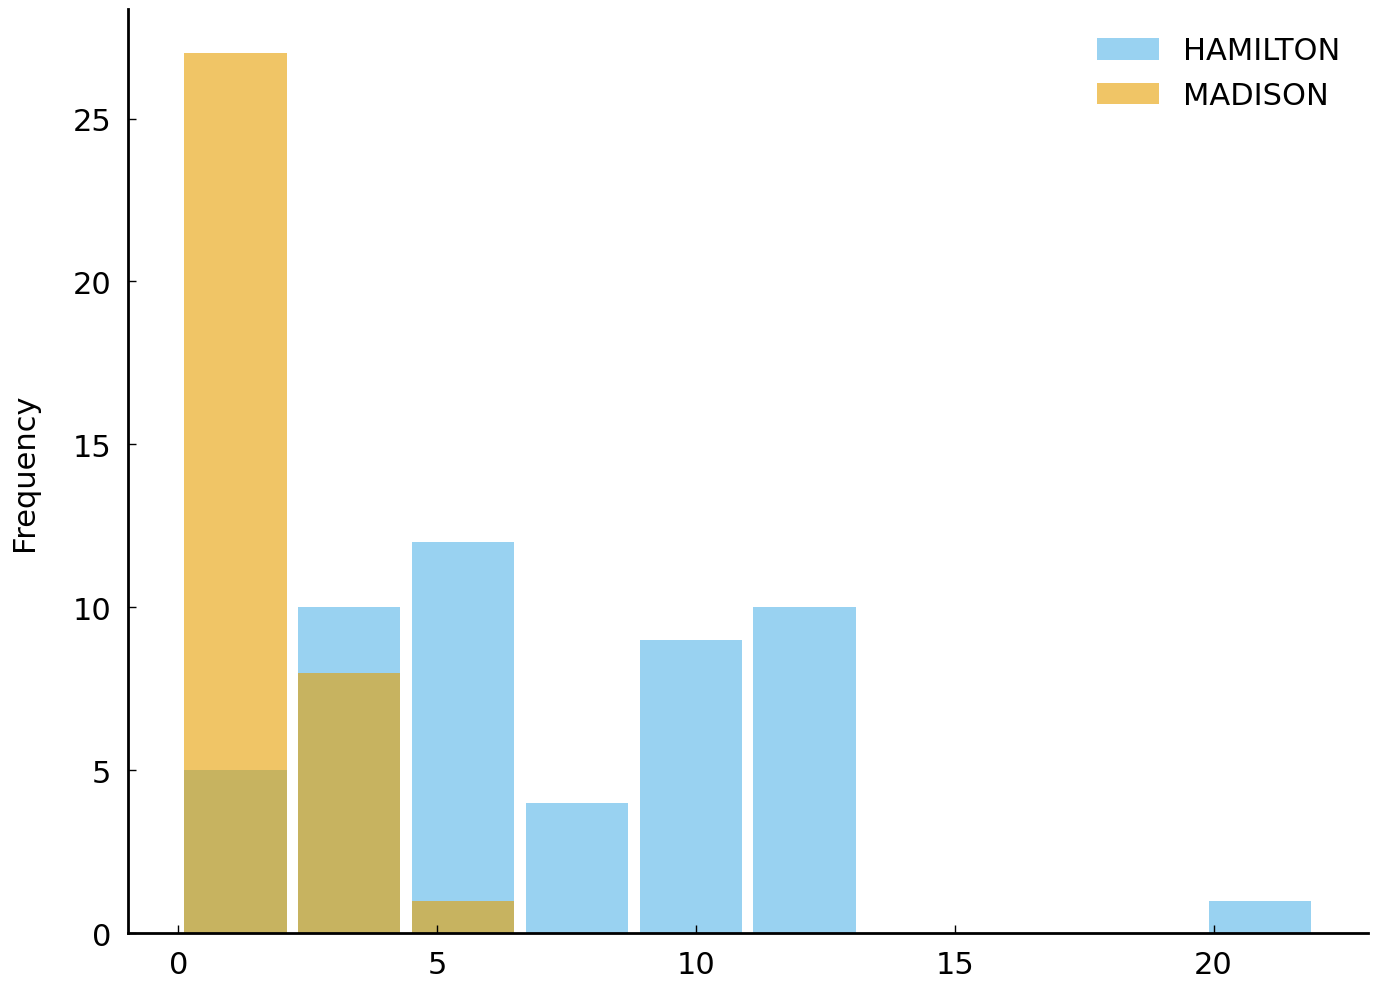

In [6]:
df_known.groupby('AUTHOR')['upon'].plot.hist(
    rwidth=0.9, alpha=0.6, range=(0, 22), legend=True);

<!-- Figure: Frequency of *upon* in essays by Hamilton and Madison.\label{fig:intro-probability:freq-upon} -->

The difference, indeed, is dramatic enough that the visual aid of the <span
class="index">histogram</span> is not strictly necessary. Hamilton uses *upon* far more
than Madison. We can gain a sense of this by comparing any number of summary statistics
(see {ref}`chp-statistics-essentials`), including the maximum frequency of *upon*, the
mean frequency, or the median (50th percentile). These summary statistics are conveniently
produced by the ``DataFrame`` method <span class="index">``describe()``</span>:

In [7]:
df_known.groupby('AUTHOR')['upon'].describe()

count      mean       std  min  25%  50%    75%   max
AUTHOR                                                         
HAMILTON   51.0  7.333333  4.008325  2.0  4.0  6.0  10.00  20.0
MADISON    36.0  1.250000  1.574348  0.0  0.0  0.5   2.25   5.0

In [8]:
np.testing.assert_array_almost_equal(
    df_known.groupby('AUTHOR')['upon'].mean().values, [7.33333333, 1.25])

In this particular case, we get an even clearer picture of the difference
between the two writers' use of *upon* by considering the proportion of essays
in which *upon* appears at all (i.e., one or more times). In our sample,
Hamilton always uses *upon* whereas we are as likely as not to observe it in
an essay by Madison.

In [9]:
# The expression below applies `mean` to a sequence of binary observations
# to get a proportion. For example,
# np.mean([False, False, True]) == np.mean([0, 0, 1]) == 1/3
proportions = df_known.groupby('AUTHOR')['upon'].apply(
    lambda upon_counts: (upon_counts > 0).mean())
print(proportions)

AUTHOR
HAMILTON    1.0
MADISON     0.5
Name: upon, dtype: float64


In the preceding block we make use of the methods ``groupby()`` (of ``DataFrame``)
and <span class="index">``apply()``</span> (of <span class="index">``SeriesGroupBy``</span>)---cf. section
{ref}`sec-working-with-data-turnover-in-naming-practices`. Recall that the ``SeriesGroupBy`` method ``apply()``
works in the following manner: provided a single, callable argument (e.g., a
function or a lambda expression), ``apply()`` calls the argument with the discrete
individual series generated by the ``groupby()`` method. In this case, ``apply()``
first applies the <span class="index">``lambda``</span> to the sequence of *upon* counts associated with
Hamilton and then to the sequence of counts associated with Madison. The
``lambda`` expression itself makes use of a common pattern in scientific
computing: it calculates the average of a sequence of binary (0 or 1)
observations. When the value 1 denotes the presence of a trait and 0 denotes its
absence---as is the case here---the mean will yield the proportion of
observations in which the trait is present. For example, if we were studying the
presence of a specific feature in a set of five essays, we might evaluate
``np.mean([0, 0, 1, 1, 0])`` and arrive at an answer of $\frac{2}{5} = 0.4$.

With the heavy lifting behind us, we can create a <span class="index">bar chart</span> which shows the
proportion of essays (of known authorship) which contain *upon*, for each
author.

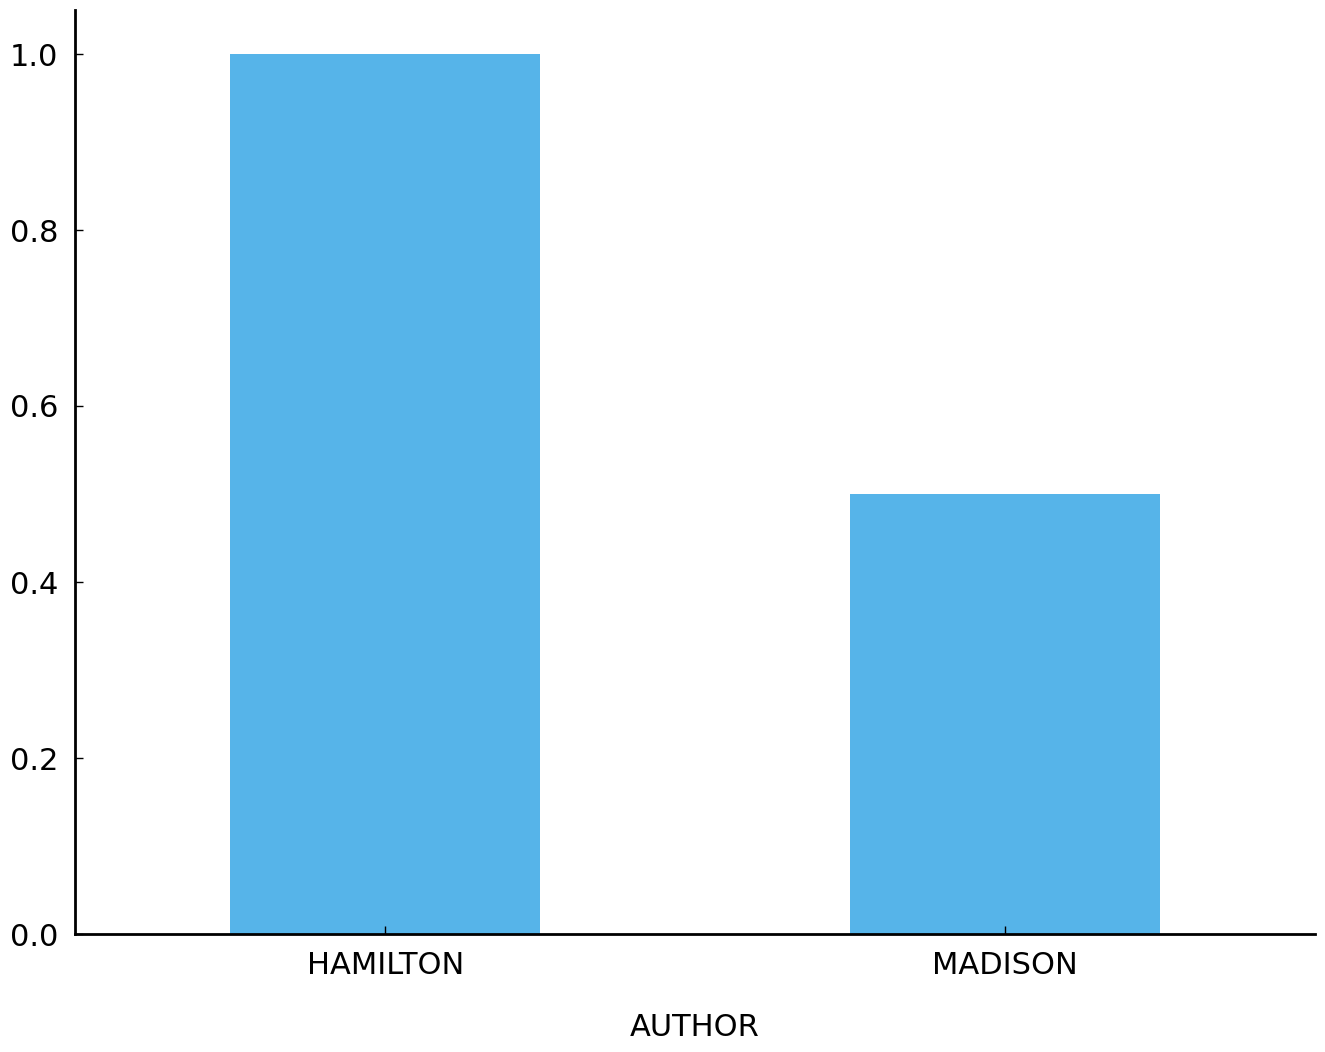

In [10]:
proportions.plot.bar(rot=0);

<!-- Figure: Proportion of essays with at least one *upon*.\label{fig:intro-probability:prop-upon} -->

In [11]:
proportions

AUTHOR
HAMILTON    1.0
MADISON     0.5
Name: upon, dtype: float64

Hamilton uses *upon* more often and more consistently than Madison. While the
word *upon* appears in every one of the 51 essays by Hamilton (100%), the word
occurs in only 18 of the 36 essays by Madison (50%). Observing this
difference, we should conclude that observing the word *upon* one or more times
in a disputed essay is more consistent with the hypothesis that the author is
Hamilton than with the hypothesis that Madison is the author. Precisely how
much more consistent is something which must be determined.

Observing the word *upon* in a disputed essay is hardly decisive evidence that
Hamilton wrote the essay; Madison uses the word *upon* occasionally and, even if
he never was observed to have used the word, we need to keep in mind the wide
range of unlikely events that could have added an *upon*
to a Madison-authored essay, such as the insertion of an *upon* by an
editor. These considerations will inform a precise description of the
probability of the evidence, something we need if we want to use Bayes's rule and
update our belief about the authorship of a disputed essay.

The following is a description of the probability of the evidence (observing
the word *upon* one or more times in a disputed essay) given the hypothesis
that Hamilton is the author. Suppose we think that observing *upon* is far from
decisive.  Recalling that probabilities are just descriptions of degree of
belief (scaled to lie between 0 and 1 and following the axioms of probability),
we might say that if Hamilton wrote the disputed essay, the probability of it
containing one or more occurrences of the word *upon* is 0.7. In symbols, we
would write $\Pr(E|H) = 0.7$. We're using $\Pr(E|H)$ to denote the probability
of observing the word *upon* in an unobserved essay given that Hamilton is the
author.

Now let's consider Madison. Looking at how often Madison uses the word *upon*,
we anticipate that it is as likely as not that he will use the word (one or more
times) if the disputed essay is indeed written by him. Setting $\Pr(E|\neg H) = 0.5$
seems reasonable. Suppose that we are now presented with one of the disputed
essays and we observe that the word *upon* does indeed occur one or more
times. <span class="index">Bayes's rule</span> tells us how our belief should change after observing this
piece of evidence:

\begin{equation}\label{eq:bayes-after-evidence}
\Pr(H_j|E) = \frac{\Pr(E|H_j)\Pr(H_j)}{\sum_{k=1}^K \Pr(E|H_k)\Pr(H_k)}
\end{equation}

Since the hypothesis space is partitioned by $H$ and $\neg H$ ("not H"), the formula can
be rewritten. As we only have two possible authors (Hamilton or Madison) we
can write $H$ for the hypothesis that Hamilton wrote the disputed essay and
$\neg H$ for the hypothesis that Madison (i.e., not Hamilton) wrote
the disputed essay. And since we have settled on values for all the terms on
the right-hand side of the equation we can complete the calculation:

$$\begin{aligned}
\Pr(H|E) &= \frac{\Pr(E|H)\Pr(H)}{\Pr(E|H)\Pr(H) + \Pr(E|\neg H)\Pr(\neg H)} \\
         &= \frac{(0.7)(0.5)}{(0.7)(0.5) + (0.5)(0.5)} \approx 0.58 \\
\end{aligned}$$

It makes sense that our degree of belief in Hamilton being the author increases
from 0.5 to 0.58 in this case: Hamilton uses *upon* far more than Madison, so
seeing this word in a disputed essay should increase (or, at least, certainly
not decrease) the plausibility of the claim that Hamilton is the author. The
precise degree to which it changes is what Bayes's rule contributes.

(sec-intro-probability-random-variables)=
### Random variables and probability distributions

In the previous example, we simplified the analysis by only concerning ourselves with
whether or not a word occurred one or more times. In this specific case the simplification
was not consequential, since we were dealing with a case where the presence or absence of
a word was distinctive. Assessing the distinctiveness of word usage in cases where the
word is common (i.e., it typically occurs at least once) requires the use of a discrete
probability distribution. One distribution which will allow us to model the difference
with which authors use words such as *by* and *whilst* is the <span class="index">negative
binomial distribution</span>. When working with models of individual word frequencies in
text documents, the negative binomial distribution is almost always a better choice than
the binomial distribution.

```{margin}
{cite:t}`simon1955class` called attention to this property of the
negative binomial distribution. The relevance of this property to Mosteller and
Wallace's choice is discussed in section 3.1 of {cite:t}`airoldi2006who`.
```
The key feature of texts that the
negative binomial distribution captures and that the <span class="index">binomial
distribution</span> does not is the <span class="index">*burstiness*</span> or *contagiousness* of uncommon words:
if an uncommon word, such as a location name or person's name, appears in a
document, the probability of seeing the word a second time should go up
{cite:p}`church1995poisson`.

Examining the frequency with which Madison and Hamilton use the word *by*, it
is easy to detect a pattern. Based on the sample we have, Madison reliably uses
the word *by* more often than Hamilton does: Madison typically uses the word 13
times per 1,000 words; Hamilton typically uses it about 6 times per 1,000
words. To reproduce these rate calculations, we first scale all word frequency
observations into rate per 1,000 words. After doing this, we exclude essays not
written by Hamilton or Madison and then display the average rate of *by*.

In [12]:
df = pd.read_csv('data/federalist-papers.csv', index_col=0)
author = df['AUTHOR']  # save a copy of the author column
df = df.drop('AUTHOR', axis=1)  # remove the author column
df = df.divide(df.sum(axis=0))  # rate per 1 word
df *= 1000  # transform from rate per 1 word to rate per 1,000 words
df = df.round()  # round to nearest integer
df['AUTHOR'] = author  # put author column back
df_known = df[df['AUTHOR'].isin({'HAMILTON', 'MADISON'})]

df_known.groupby('AUTHOR')['by'].describe()

count       mean       std  min   25%   50%   75%   max
AUTHOR                                                           
HAMILTON   51.0   7.019608  4.925404  1.0   5.0   6.0   9.0  34.0
MADISON    36.0  12.916667  4.094421  5.0  10.0  12.5  15.0  23.0

We can visualize the difference in the authors' use of *by* with two overlapping
histograms:

<!-- for plots involving "by", range is (0, 35), ylim is (0, 24) -->

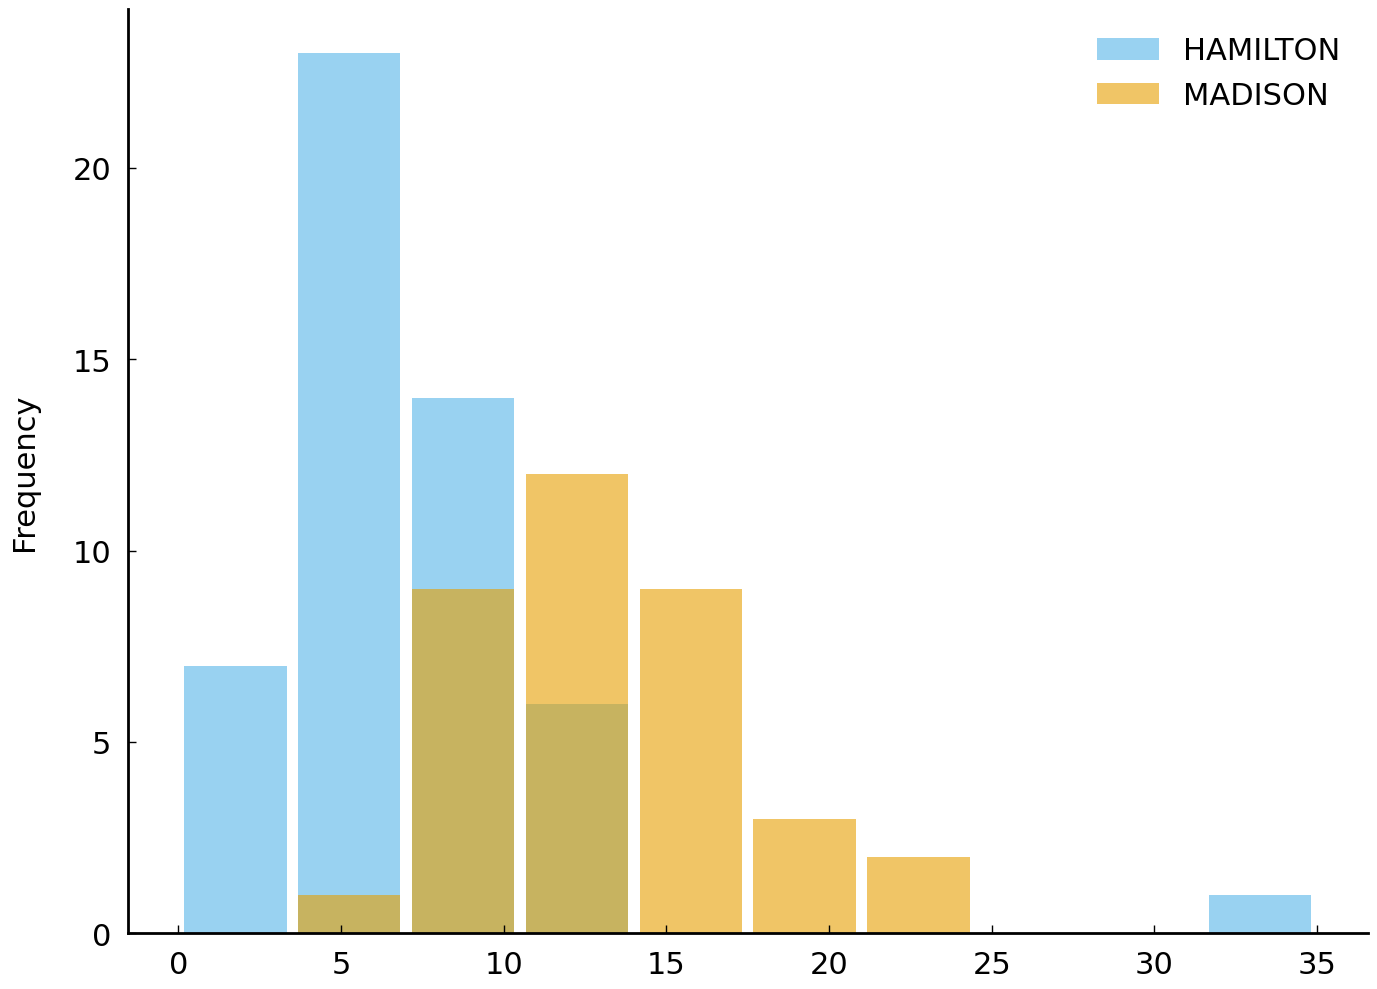

In [13]:
df_known.groupby('AUTHOR')['by'].plot.hist(
    alpha=0.6, range=(0, 35), rwidth=0.9, legend=True);

<!-- Figure: Frequency of "by" in essays by Hamilton and Madison.\label{fig:intro-probability:freq-of-by} -->

Looking at the distribution of frequencies above, it is clear that there is
evidence of a systematic difference in the rate the two writers use the word
*by*. A high rate of *by* for Hamilton (the 75th percentile is 12) is less than
the typical rate Madison uses the word (the median for Madison is 12.5).

There is one case, Federalist No. 83, clearly visible in the <span class="index">histogram</span>, which
is written by Hamilton and features a very high rate of *by*. This high rate has
a simple explanation.  Federalist No. 83's topic is the institution of trial
*by jury* and understandably features the two-word sequence *by jury* 36
times. If we ignore the *by* instances which occur in the sequence *by jury*,
*by* occurs about 7 times per 1,000 words, safely in the region of expected
rates from Hamilton given the other texts. Federalist No. 83 provides an
excellent cautionary example of an allegedly content-free "function word" *by*
turning out to be intimately connected to the content of a text. We can verify
that the outlier is indeed Federalist No. 83 by querying our ``DataFrame``:

In [14]:
print(df_known.loc[df_known['by'] > 30, 'by'])

83    34.0
Name: by, dtype: float64


And we can verify, using the full text of Federalist No. 83, that the two-word
phrase *by jury* appears 36 times in the text. Setting these appearances aside, we can
further check that the rate of *by* (without *by jury*) is about 7 per 1,000 words.

In [15]:
# HIDE THIS CELL (data check)
assert df_known.loc[df_known['by'] > 30, 'by'].index == 83

In [16]:
with open('data/federalist-83.txt') as infile:
    text = infile.read()

# a regular expression here would be more robust
by_jury_count = text.count(' by jury')
by_count = text.count(' by ')
word_count = len(text.split())  # crude word count
by_rate = 1000 * (by_count - by_jury_count) / word_count

print('In Federalist No. 83 (by Hamilton), without "by jury", '
      f'"by" occurs {by_rate:.0f} times per 1,000 words on average.')

In Federalist No. 83 (by Hamilton), without "by jury", "by" occurs 7 times per 1,000 words on average.


In the block above, we read in a file containing the text of Federalist No. 83 and
count the number of times *by jury* occurs and the number of times *by*
(without *jury*) occurs. We then normalize the count of *by* (without *jury*)
to the rate per 1,000 words for comparison with the rate observed elsewhere.

While it would be convenient to adopt the approach we took with *upon* and apply
it to the present case, unfortunately we cannot. The word *by* appears in every
one of the essays with an established author; the approach we used earlier will
not work. That is, if we expect both authors to use *by* at least once per 1,000
words, the probability of the author being Hamilton given that *by* occurs at
least once is very high and the probability of the author being Madison given
that *by* occurs at least once is also very high. In such a situation---when
$\Pr(E|H) \approx \Pr(E|\neg H)$---<span class="index">Bayes's rule</span> guarantees we will learn little:
$\Pr(H|E) \approx P(H)$. In order to make use of information about the frequency
of *by* in the unknown essay, we need a more nuanced model of each author's
tendency to use *by*. We need to have a precise answer to questions such as the
following: if we pick 1,000 words at random from Madison's writing, how likely
are we to find 6 instances of *by* among them? More than 12 instances? How
surprising would it be to find 40 or more?

#### Negative binomial distribution

We need a model expressive enough to answer all these questions. This model must be
capable of saying that among 1,000 words chosen at random from the known essays by an
author, the probability of finding $x$ instances of *by* is a specific probability. In
symbols we would use the symbol $X$ to denote the "experiment" of drawing 1,000 words at
random from an essay and reporting the number of *by* instances and write lowercase $x$
for a specific realization of the experiment. This lets us write $p = \Pr(X = x|H) = f(x)$
to indicate the probability of observing a rate of $x$ *by* tokens per 1,000 words given
that the text is written by Hamilton. Whatever function, $f$, we choose to model $X$
(called a *random variable*), we will need it to respect the axioms of probability. For
example, following axiom 1, it must not report a probability less than zero or greater
than 1. There are many functions (called "<span class="index">probability mass
function</span>s") which will do the job. Some will be more faithful than others in
capturing the variability of rates of *by* which we observe (or feel confident we will
observe). That is, some will be better aligned with our degrees of belief in observing the
relevant rate of *by* given that Hamilton is the author. Candidate distributions include
the <span class="index">Poisson distribution</span>, the <span class="index">binomial
distribution</span>, and the <span class="index">negative binomial distribution</span>. We
will follow Mosteller and Wallace and use the negative binomial distribution.
```{margin}
Mosteller and Wallace
justify their choice of the negative binomial distribution at length
({cite:t}`mosteller1964inference`, 28--35).
```

$X$, a <span class="index">*random variable*</span>, is said to be distributed according
to a negative binomial distribution with parameters $\alpha$ and $\beta$ if

$$\Pr(X = x \,|\, \alpha, \beta) =
\binom{x + \alpha - 1}{\alpha - 1}
\,
\left( \frac{\beta}{\beta+1} \right)^{\!\alpha}
\,
\left( \frac{1}{\beta + 1} \right)^{\!x} \!.
$$

```{admonition} Random variable
A <span class="index">*random variable*</span> is defined as a function from a *sample space* into the real numbers. A random variable, $X$, intended to represent whether the toss of a coin landed "heads" would be associated with the sample space $S = \{H, T\}$, where $H$ and $T$ indicate the two possible outcomes of the toss ($H$ for "heads" and $T$ for "tails"). Each of these potential outcomes is associated with a probability. In this case, $\Pr(H)$ and $\Pr(T)$ might be equal to 0.5. The random variable $X$ takes on numeric values; here it would take on the value 1 if the outcome of the random experiment (i.e., "flipping a coin") was $H$, otherwise the random variable would take on the value 0. That is, we observe $X = 1$ if and only if the outcome of the random experiment is $H$. The probability function $\Pr$ associated with the sample space induces a probability function associated with $X$ which we could write $\Pr_X$. This function must satisfy the <span class="index">axioms of probability</span>. In symbols, it would be written $\Pr_X(X = x_i) = \Pr(\{s_j \in S : X(s_j) = x_i\})$ ({cite:t}`casella2001statistical`, section 1.1-1.4).
```

```{margin}
When dealing with continuous random variables,
we need "probability density functions" or "pdfs". Working with these, however, requires
additional care as the probability of a point is always
zero---just as the mass of a physical object at a point is also zero.
```
This function $\Pr(X = x \,|\, \alpha, \beta)$ is a <span class="index">probability mass
function</span> (abbreviated "<span class="index">pmf</span>"). If a
<span class="index">random variable</span> follows this distribution we may also write $X \sim
\distro{NegBinom}(\alpha,\beta)$ and say that $X$ is distributed according
to a negative binomial distribution. 
```{margin}
The
parameterization of the negative binomial distribution follows the
parameterization described in {cite:t}`gelman2003bayesian`. Mosteller and Wallace use a
different parameterization of the negative binomial distribution. The choice of
parameterization does not affect results.
```
Given a sequence of draws from such a
random variable, we would find that the sequence has mean
$\frac{\alpha}{\beta}$ and variance $\frac{\alpha}{\beta^2} (\beta + 1)$. The derivation of these results from
the negative binomial pmf above is a subject covered in most probability courses
and introductory textbooks.

For example, if $X \sim \distro{NegBinom}(5, 1)$ then the probability of
observing $X = 6$ is, according to the pmf above, approximately 10 percent. The
probability of observing $X = 14$ is considerably lower, 0.5 percent.  We can
verify these calculations by translating the negative binomial pmf stated above
into Python code. The following function, ``negbinom_pmf()``,  makes use of one
possibly unfamiliar function, ``scipy.special.binom(a, b)`` which calculates,
as the name suggests, the binomial coefficient $\binom{a}{b}$.

In [17]:
import scipy.special

def negbinom_pmf(x, alpha, beta):
    """Negative binomial probability mass function."""
    # In practice this calculation should be performed on the log
    # scale to reduce the risk of numeric underflow.
    return (
        scipy.special.binom(x + alpha - 1, alpha - 1)
        * (beta / (beta + 1)) ** alpha
        * (1 / (beta + 1)) ** x
    )

print('Pr(X = 6):', negbinom_pmf(6, alpha=5, beta=1))
print('Pr(X = 14):', negbinom_pmf(14, alpha=5, beta=1))

Pr(X = 6): 0.1025390625
Pr(X = 14): 0.00583648681640625


Further discussion of discrete distributions and probability mass functions is
not necessary to appreciate the immediate usefulness of the <span class="index">negative binomial
distribution</span> as a tool which provides answers to the questions asked above.
With suitably chosen parameters $\alpha$ and $\beta$, the negative binomial
distribution (and its associated probability mass function) provides precise
answers to questions having the form we are interested in, questions such as
the following: how likely is it for a 1,000-word essay by Hamilton to
contain 6 instances of *by*? Moreover, the negative binomial distribution can
provide plausible answers to such questions, where plausibility is defined with
reference to our degrees of belief.

How well the answers align with our beliefs about plausible rates of *by*
depends on the choice of the parameters $\alpha$ and $\beta$. It is not
difficult to find appropriate parameters, as the graphs below will make clear.
The graphs show the observed rates of *by* from Hamilton's essays alongside
simulated rates drawn from negative binomial distributions with three different
parameter settings. How we arrived at these precise parameter settings is
addressed in the Appendix {ref}`appendix-intro-probability-fitting-nbd`.

The first plot bewlow will show the empirical distribution of the *by* rates we
observe in Hamilton's (non-disputed) essays. These observed rates are all the
information we have about Hamilton's tendency to use *by*, so we will choose a
<span class="index">negative binomial distribution</span> which roughly expresses the same information.

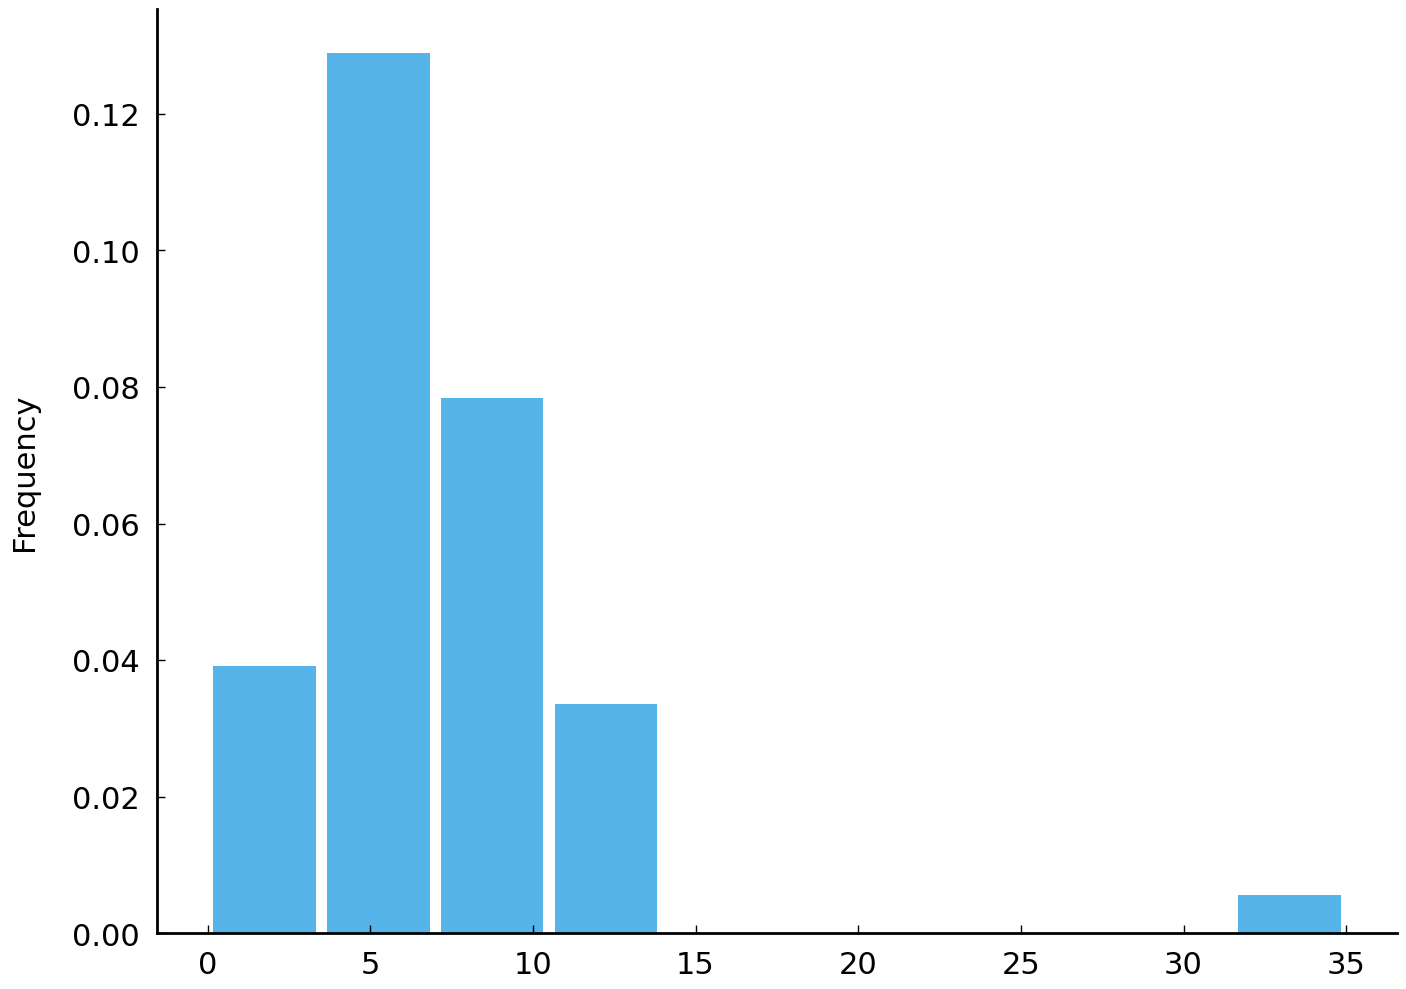

In [18]:
df_known[df_known['AUTHOR'] == 'HAMILTON']['by'].plot.hist(
    range=(0, 35), density=True, rwidth=0.9);

<!-- Figure: Observed relative frequency of "by" in Hamilton essays.\label{fig:intro-probability-obs-by} -->

In [19]:
df_known[df_known['AUTHOR'] == 'HAMILTON']['by'].describe()

count    51.000000
mean      7.019608
std       4.925404
min       1.000000
25%       5.000000
50%       6.000000
75%       9.000000
max      34.000000
Name: by, dtype: float64

Now that we know what we're looking for -- a distribution with plenty of mass
between 1 and 10 and minimal support for observations greater than 40 -- we can
look at various negative binomial distributions and see if any will work as
approximations of our degrees of belief about Hamilton's tendency to use *by*
around 1787.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


findfont: Generic family 'sans-serif' not found because none of the following families were found: "Roboto Condensed Regular"


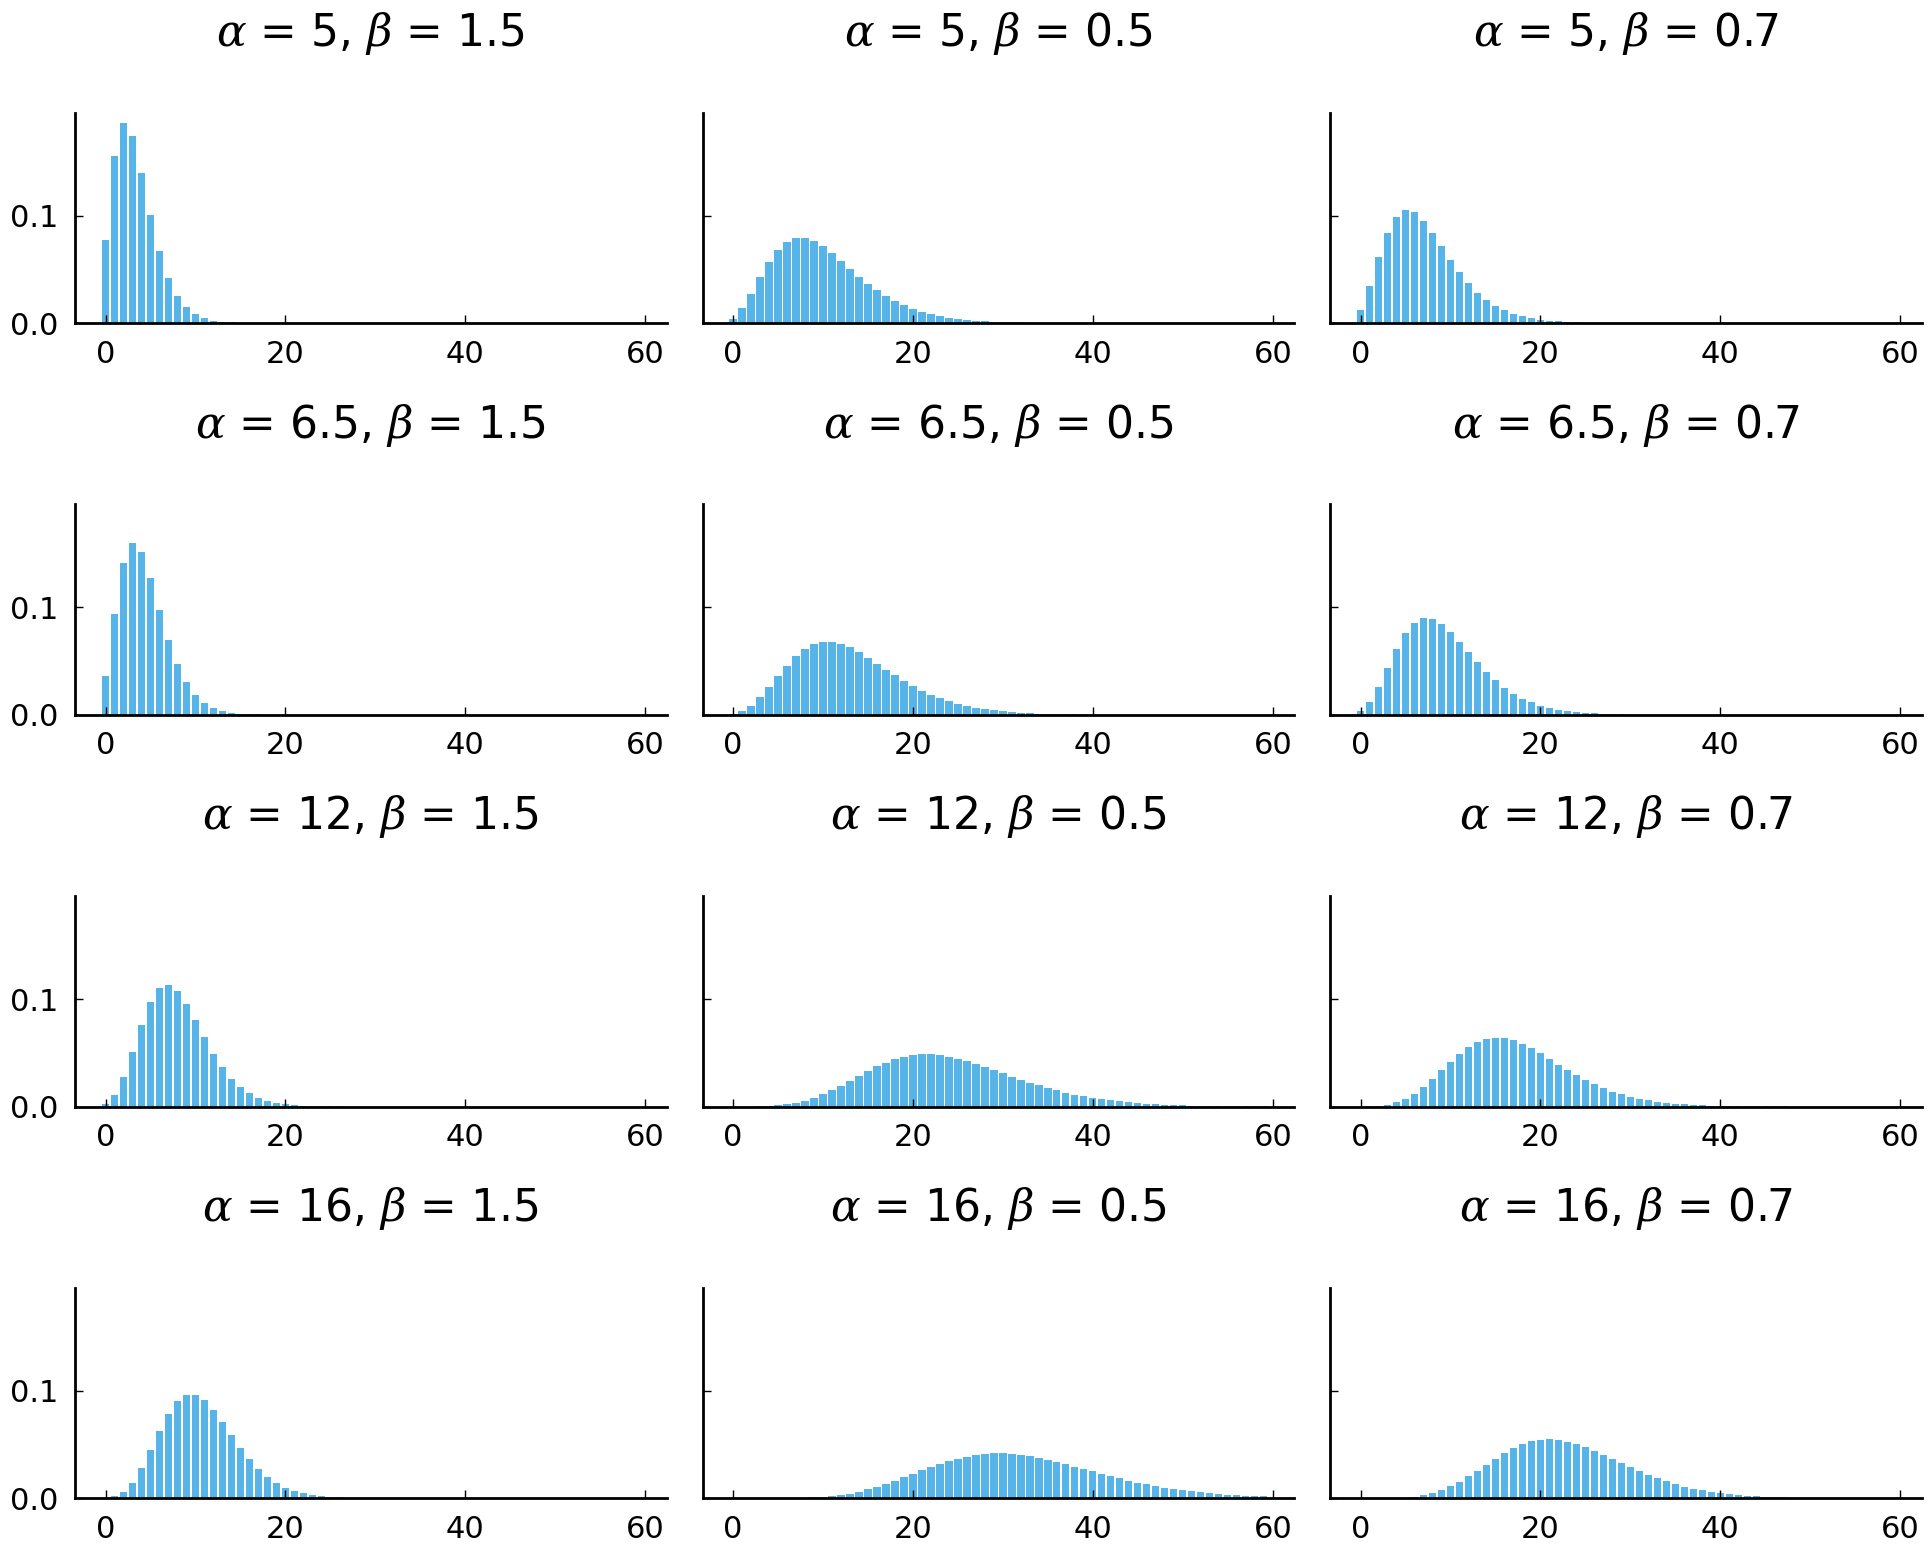

In [20]:
import itertools
import matplotlib.pyplot as plt

x = np.arange(60)
alphas, betas = [5, 6.5, 12, 16], [1.5, 0.5, 0.7]
params = list(itertools.product(alphas, betas))
pmfs = [negbinom_pmf(x, alpha, beta) for alpha, beta in params]

fig, axes = plt.subplots(4, 3, sharey=True, figsize=(10, 8))
axes = axes.flatten()

for ax, pmf, (alpha, beta) in zip(axes, pmfs, params):
    ax.bar(x, pmf)
    ax.set_title(fr'$\alpha$ = {alpha}, $\beta$ = {beta}')
plt.tight_layout();

<!-- Figure: Different candidate negative binomial distributions for Hamilton's tendency to use *by*.\label{fig:intro-probability:candidates:hamilton} -->

The parameterization of $\alpha = 5$ and $\beta = 0.7$ is one of the models that
(visually) resembles the empirical distribution.  Indeed, if we accept
$\distro{NegBinom}(5, 0.7)$ as modeling our degrees of belief about Hamilton's
use of *by*, the distribution has the attractive feature of predicting the same
average rate of *by* as we observe in the Hamilton essays in the corpus. We can
verify this by simulating draws from the distribution and comparing the <span class="index">summary
statistics</span> of our sampled values with the observations we have encountered so
far.

In [21]:
def negbinom(alpha, beta, size=None):
    """Sample from a negative binomial distribution.

    Uses `np.random.negative_binomial`, which makes use of a
    different parameterization than the one used in the text.
    """
    n = alpha
    p = beta / (beta + 1)
    return np.random.negative_binomial(n, p, size)

samples = negbinom(5, 0.7, 10000)
# put samples in a pandas Series in order to calculate summary statistics
pd.Series(samples).describe()

count    10000.00000
mean         7.07620
std          4.11972
min          0.00000
25%          4.00000
50%          6.00000
75%          9.00000
max         29.00000
dtype: float64

The <span class="index">negative binomial distribution</span> with fixed
parameters---$\alpha = 5$ and $\beta = 0.7$ were used in the code block above---is an
oracle which answers the questions we have. For any observed value of the rate of *by* in
a disputed essay we can provide an answer to the question, "Given that Hamilton is the
author of the disputed essay, what is the probability of observing a rate $x$ of *by*?"
The answer is $\Pr(X = x|\alpha, \beta)$ for fixed values of $\alpha$ and $\beta$,
something we can calculate directly with the function ``negbinom_pmf(x, alpha, beta)``.
Now that we have a way of calculating the probability of *by* under the hypothesis that
Hamilton is the author, we can calculate a quantity that plays the same role that
$\Pr(E|H)$ played in the previous section. This will allow us to use <span
class="index">Bayes's rule</span> to calculate our degree of belief in the claim that
Hamilton wrote a disputed essay, given an observed rate of *by* in the essay.

Now let us consider some plausible models of Madison's use of the word *by*. In
order to use Bayes's rule we will need to be able to characterize how plausible
different rates of *by* are, given that Madison is the author.

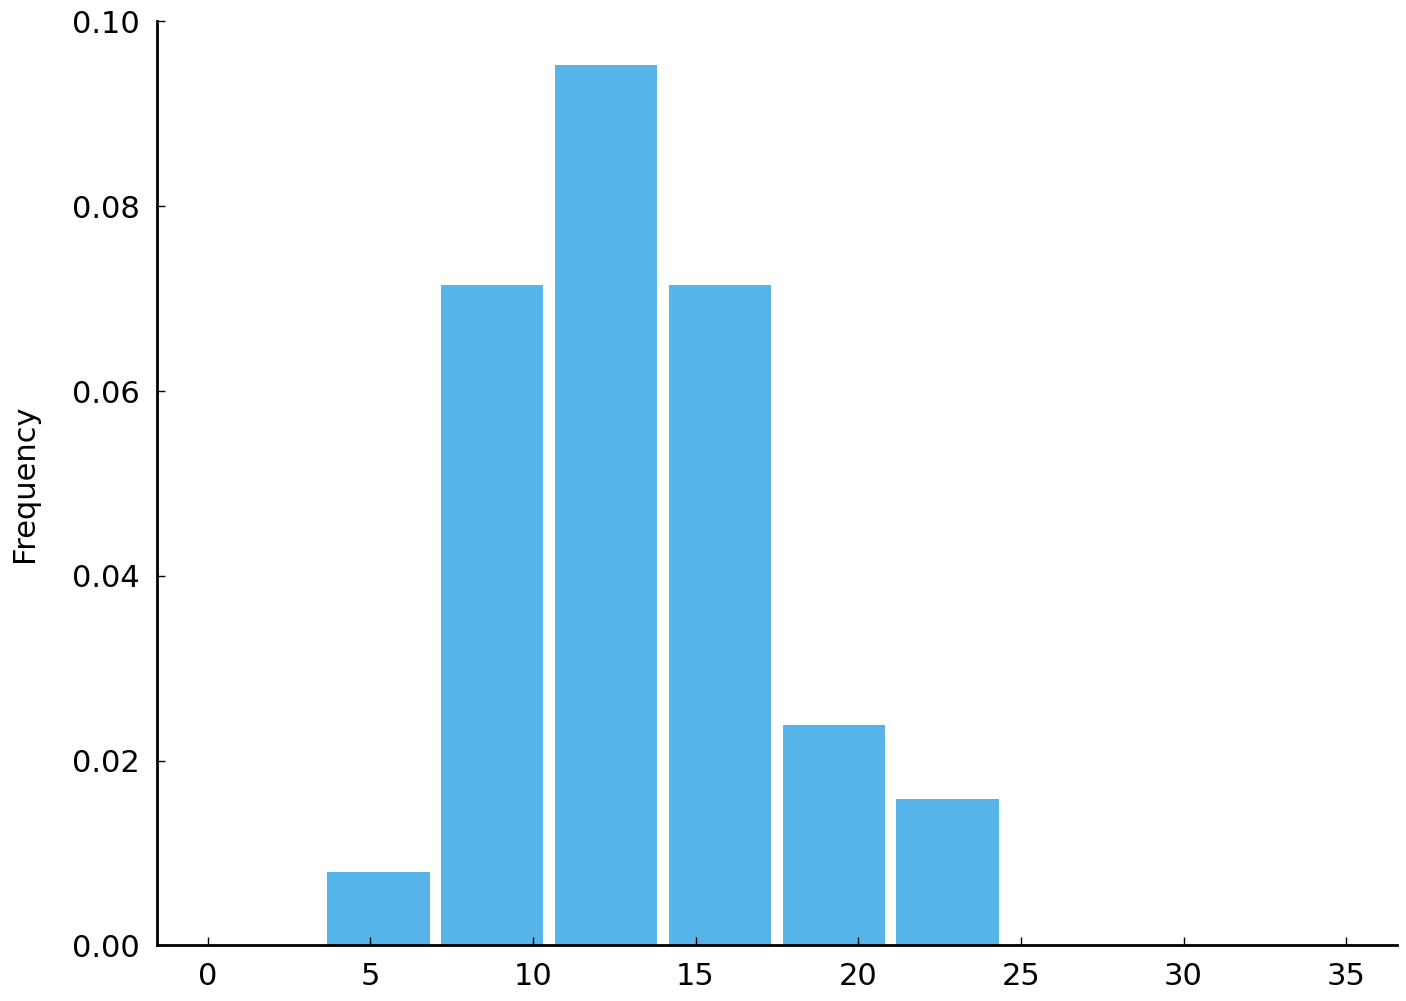

In [22]:
df_known[df_known['AUTHOR'] == 'MADISON']['by'].plot.hist(
    density=True, rwidth=0.9, range=(0, 35)  # same scale as with Hamilton
);

<!-- Figure: Observed relative frequency of "by" in Madison essays.\label{fig:intro-probability-obs-madison} -->

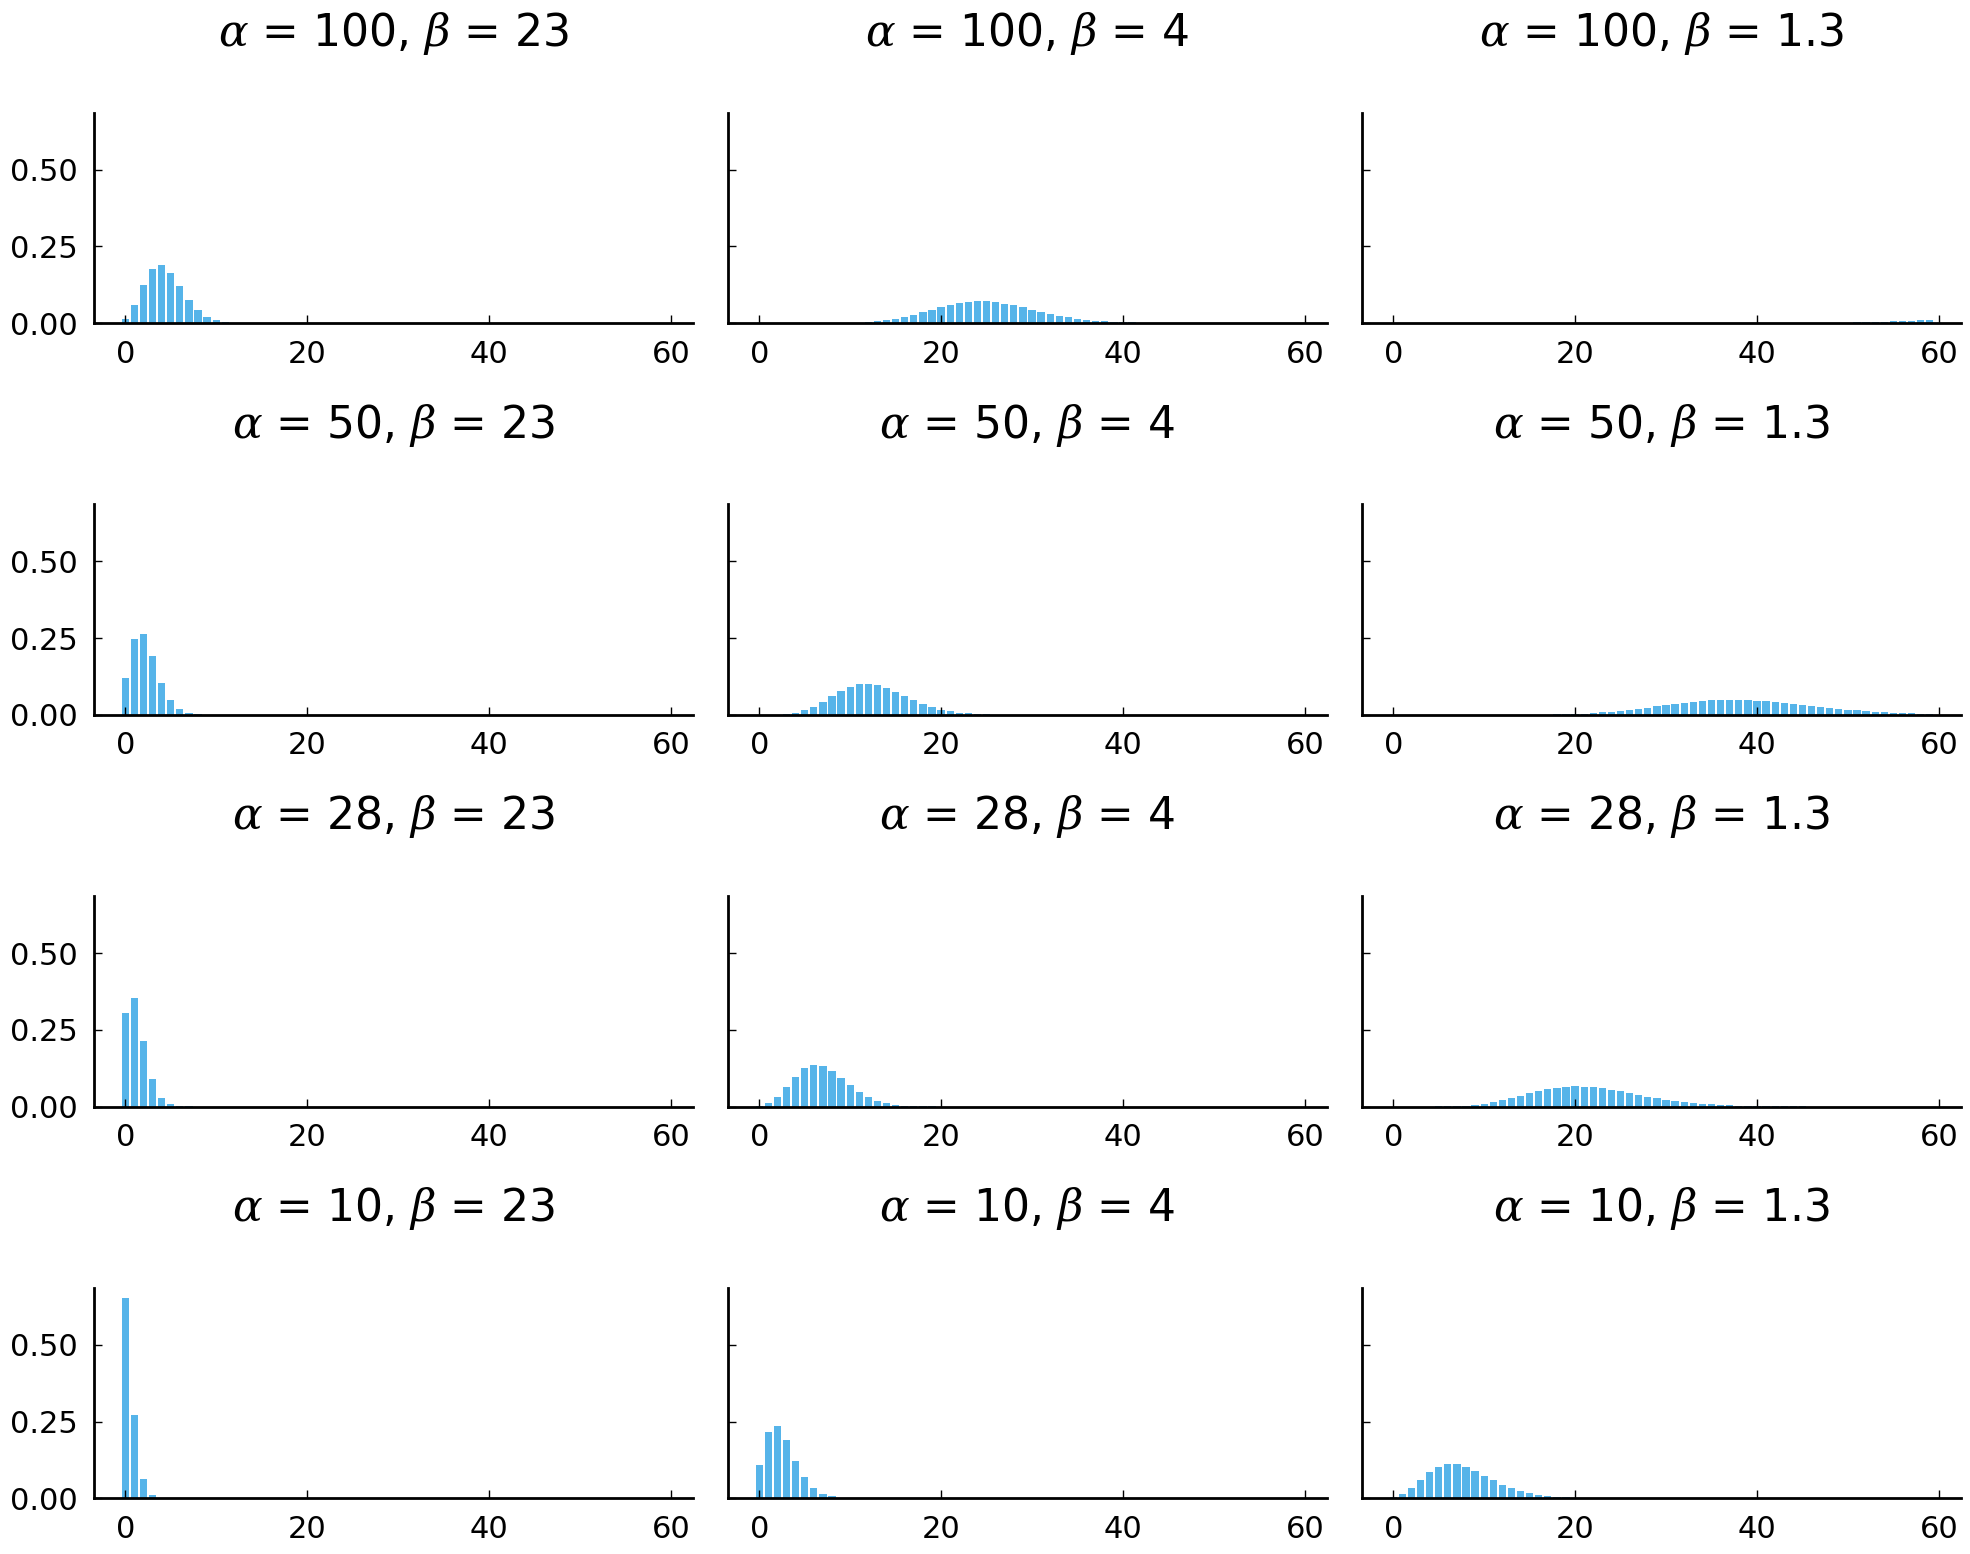

In [23]:
x = np.arange(60)
alphas, betas = [100, 50, 28, 10], [23, 4, 1.3]
params = list(itertools.product(alphas, betas))
pmfs = [negbinom_pmf(x, alpha, beta) for alpha, beta in params]

fig, axes = plt.subplots(4, 3, sharey=True, figsize=(10, 8))
axes = axes.flatten()

for ax, pmf, (alpha, beta) in zip(axes, pmfs, params):
    ax.bar(x, pmf)
    ax.set_title(fr'$\alpha$ = {alpha}, $\beta$ = {beta}')
plt.tight_layout()

<!-- Figure: Different candidate negative binomial distributions for Madison's tendency to use *by*.\label{fig:intro-probability-candidate-madison} -->

If $\alpha$ is 50 and $\beta$ is 4, the model resembles the empirical
distribution of the rates of *by* in the Madison essays. Most values are between
5 and 25 and the theoretical mean of the <span class="index">negative binomial distribution</span> is
similar to the empirical mean. Compare the two (idealized) models of the use of
*by* with the rates of *by* we have observed in the essays with known
authorship.

<!-- the `range` in the plot below seems to be useful, we no longer have to specify bins; yet it also seems to be ignored, since the range is broader than (0, 35) -->

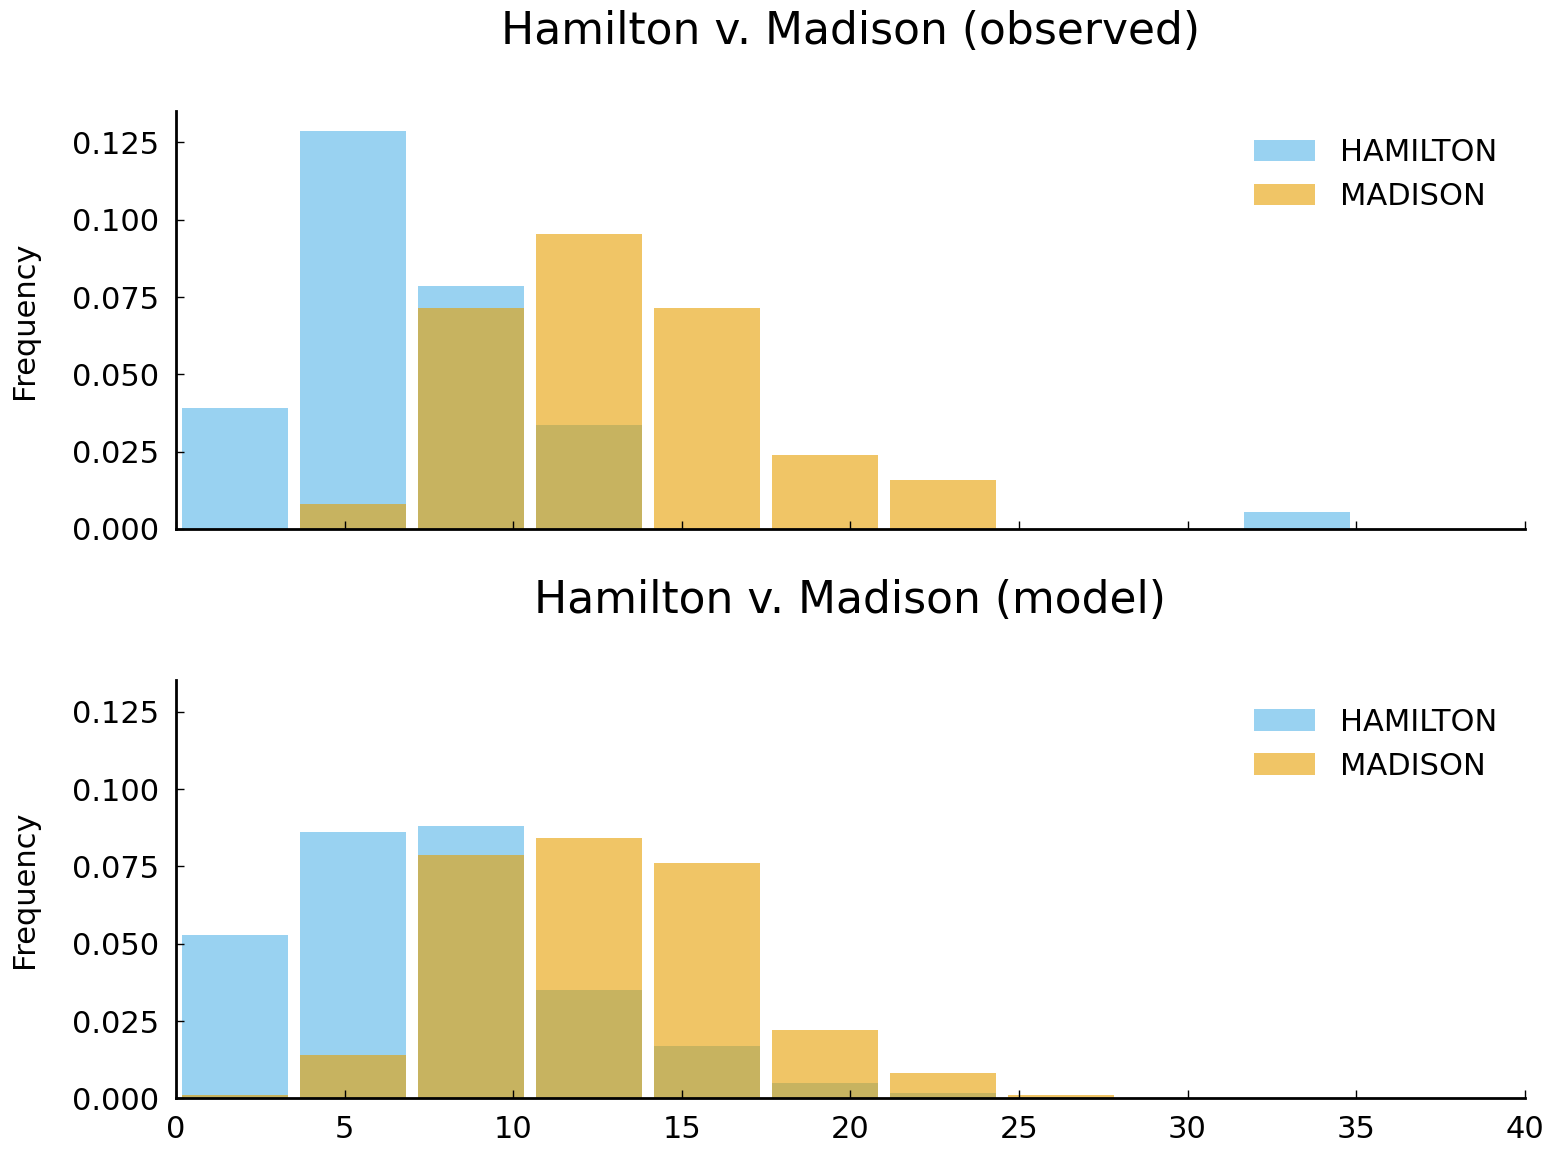

In [24]:
authors = ('HAMILTON', 'MADISON')
alpha_hamilton, beta_hamilton = 5, 0.7
alpha_madison, beta_madison = 50, 4

# observed
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)
df_known.groupby('AUTHOR')['by'].plot.hist(
    ax=axes[0], density=True, range=(0, 35), rwidth=0.9, alpha=0.6,
    title='Hamilton v. Madison (observed)', legend=True)

# model
simulations = 10000
for author, (alpha, beta) in zip(authors, [(alpha_hamilton, beta_hamilton),
                                           (alpha_madison, beta_madison)]):
    pd.Series(negbinom(alpha, beta, size=simulations)).plot.hist(
        label=author, density=True, rwidth=0.9, alpha=0.6, range=(0, 35), ax=axes[1])
axes[1].set_xlim((0, 40))
axes[1].set_title('Hamilton v. Madison (model)')
axes[1].legend()
plt.tight_layout();

<!-- Figure: Comparison of two (idealized) models of the use of *by* with the rates of *by* we have observed in the essays with known authorship.\label{fig:intro-probability:model-comparison} -->

With the <span class="index">negative binomial distribution</span> available as a rough model for our
beliefs about each author's use of *by*, we have all that is required to use
Bayes's rule and assess how observing a given rate of *by* in a disputed essay
should persuade us of the plausibility of Hamilton or Madison being the author.

Imagine we are presented with one of the disputed essays and observe that
the word *by* occurs 14 times per 1,000 words---the rate observed, in fact, in
No. 57. A casual inspection of the rates for essays with known authorship tells
us that 14 instances of *by* would be rather high for Hamilton (9 per 1,000 on
average in our samples); 14 is closer to the expected rate for Madison. So we
should anticipate that the calculation suggested by Bayes' rule would increase
the odds favoring Madison. Using $\Pr(H) = \Pr(\neg H) = 0.5$ as before, we use
the probability mass function for the negative binomial distribution to
calculate the probability of observing a rate of 14 per 1,000 in an essay
authored by Hamilton and the probability of observing a rate of 14 per 1,000 in
an essay authored by Madison (probabilities analogous to $\Pr(E|H)$ and $\Pr(E|\neg H)$ in the
previous section). Instead of $E$ we will write $X$ for the observed rate of
*by*. So $\Pr(X = 14|H) = \Pr(X = x|\alpha_{Hamilton},\beta_{Hamilton}) = 0.022$ and
$\Pr(X = 14|\neg H) = \Pr(X = x|\alpha_{Madison}, \beta_{Madison}) = 0.087$.  The way
we find these values is to use the function ``negbinom_pmf()``, which we defined
above.

In [25]:
likelihood_hamilton = negbinom_pmf(14, alpha_hamilton, beta_hamilton)
print(likelihood_hamilton)

0.021512065936254765


In [26]:
likelihood_madison = negbinom_pmf(14, alpha_madison, beta_madison)
print(likelihood_madison)

0.08742647980678281


$$\begin{aligned}
\Pr(H|X = 14, \vec\theta) &= \frac{\Pr(X = 14|H)\Pr(H)}{\Pr(X = 14|H)\Pr(H) + \Pr(X = 14|\neg H)\Pr(\neg H)} \\
    &= \frac{\Pr(X = 14|\alpha_{Hamilton}, \beta_{Hamilton})\Pr(H)}{\Pr(X = 14|\alpha_{Hamilton}, \beta_{Hamilton})\Pr(H) + \Pr(X = 14|\alpha_{Madison}, \beta_{Madison})\Pr(\neg H)} \\
    &\approx \frac{(0.02)(0.5)}{(0.02)(0.5) + (0.08)(0.5)} \\
    &\approx 0.2 \\
\end{aligned}$$

In [27]:
pr_hamilton = likelihood_hamilton * 0.5 / (likelihood_hamilton * 0.5 + likelihood_madison * 0.5)
print(pr_hamilton)

0.19746973662561154


In the code above we've used the term <span class="index">*likelihood*</span> to refer to the probability
of the evidence given the hypothesis, $\Pr(E|H)$.

Bayes's rule tells us how to update our beliefs about whether or not Hamilton
wrote this hypothesized disputed essay about which we have only learned the rate
of *by* instances is 14 per 1,000. In such a case the odds turn against Hamilton
being the author, approximately 4 to 1 in favor of Madison. The rate of *by* in
the unknown essay is just one piece of evidence which we might consider in
assessing how much plausibility we assign to the claim "Hamilton wrote paper
No. 52". Mosteller and Wallace consider the rates of 30 words (*by* is in the
group of "final words") in their analysis ({cite:t}`mosteller1964inference`, 67--68).

(sec-intro-probability-further-reading)=
## Further Reading

This chapter introduced <span class="index">Bayesian inference</span>, one technique for learning from
experience. Among many possible approaches to learning from observation,
Bayesian inference provides a specific recipe for using probabilities to
describe degrees of belief and for updating degrees of belief based on
observation. Another attractive feature of Bayesian inference is its
generality. Provided we can come up with a description of our prior degree of
belief in an event occurring, as well as a description of how probable some observation would be under
various hypotheses about the event,
Bayes's rule provides us with a recipe for updating our degree of belief in the
event being realized after taking into consideration the observation. To
recall the example that we concluded with, Bayesian inference provides us with
a principled way of arriving at the claim that "it is very likely that Madison
(rather than Hamilton) wrote Federalist No. 62" given observed rates of word
usage in Federalist No.  62. This is a claim that historians writing before
1950 had no way of substantiating. Thanks to Bayesian inference and the work of
Mosteller and Wallace, the evidence and procedure supporting this claim are
accessible to everyone interested in this case of disputed authorship.

For essential background reading related to this chapter, we recommend {cite:t}`grinstead2012introduction`
which provides an introduction to discrete and continuous probability. Their book is
published by the American Mathematical Society and is available [online](https://math.dartmouth.edu/~prob/prob/prob.pdf) at. For those interested in further reading
related to the topics addressed in this chapter, we recommend an introductory text on Bayesian inference. Those with fluency in single-variable
calculus and probability will be well served by {cite:t}`hoff2009first`. While {cite:t}`hoff2009first` uses the R programming language for
performing computation and visualizing results, the code provided may be
translated into Python without much effort.

## Excercises
### Easy
1. Which of the following terms is used to denote a prior belief? a) $\Pr(E|H)$, b)
   $\Pr(H|E)$, or c) $\Pr(H)$.
2. Which of the following terms is used to describe the likelihood of an observation given a hypothesis? a) $\Pr(E|H)$, b)
   $\Pr(E)$, or c) $\Pr(H|E)$.
3. Recall the example about Pynchon from the introduction to this chapter. Suppose we improve our
   stylometric test to accurately identify a novel as being written by Pynchon from 90
   percent to 99 percent of the time. The false positive rate also decreased and now
   equals 0.1 percent. The probability that a novel was written by Pynchon is still 0.001
   percent. Suppose another text tests positive on our stylometric test. What is the
   probability that the text was written by Pynchon?

   ```{margin}
   Each essay is not a
    sequence of 1,000 words. An essay is a sequence of words of fixed length
    (assuming we can agree on word-splitting rules). The writing samples from
    Madison and Hamilton tend to be about 2,000 words, on average, and the words
    of interest are common so the consequences of this infidelity to what we
    know to be the case will be limited.
   ```
4.  Mosteller and Wallace describe Madison's and Hamilton's word usage in terms of
    frequency per 1,000 words. While most essays were longer---typically
    between 2,000 and 3,000 words---pretending as if each document were 1,000
    words and contained a fixed number of occurrences of the words of interest
    allows us to compare texts of different lengths. Inaccuracies introduced by
    rounding will not be consequential in this case. Calculate the frequency per 1,000
    words of *upon*, *the*, and *enough*.

### Moderate
Mosteller and Wallace started their investigation of the authorship of the
disputed  essays in *The Federalist Papers* by focusing on a handful of words, which, closely
reading the essays, had revealed as distinctive: *while*, *whilst*, *upon*,
*enough*. Focus on the word *enough*. Suppose you are about to inspect one
of the disputed essays and see if *enough* appears.

1. How many times does the word *enough* occur at least once in essays by Madison? How
   many times does the word occur at least once in essays by Hamilton?
2. Establish values for $\Pr(H)$, $\Pr(E|H)$, and $\Pr(E|\neg H)$ that you find
   credible. ($\Pr(E|H)$ here is the probability that the word *enough* appears in a
   disputed essay when Hamilton, rather than Madison, is the author.)
3. Suppose you learn that *enough* appears in the disputed essay. How does your belief
   about the author change?

### Challenging
1.  Consider the rate at which the word *of* occurs in texts with known authorship. If you
    were to use a binomial distribution (not a negative binomial distribution) to model
    each author's use of the word *of* (expressed in frequency per 1,000 words), what
    value would you give to the parameter $\theta$ associated with Hamilton? And with
    Madison?
2.  Working with the parameter values chosen above, suppose you observe a disputed essay
    with a rate of 8 *of*s per 1,000 words. Does this count as evidence in favor of
    Madison being the author or as evidence in favor of Hamilton being the author?

(appendix-intro-probability)=
## Appendix

(appendix-intro-probability-bayes-rule)=
### Bayes's rule

In order to derive <span class="index">Bayes's rule</span> we first begin with the third axiom of
probability:

$$\Pr(A \and B|C) = \Pr(B|C) \Pr(A|B \and C)$$

If we let $C$ be an event which encompasses all possible events ($A \and C = A$)
we have a simpler statement about a conditional probability:

$$\Pr(A|B) = \frac{\Pr(A \and B)}{\Pr(B)}$$

Replacing $A$ and $B$ with $H_j$ and $E$, respectively, we arrive at an initial
form of Bayes's rule:

$$\begin{aligned}
\Pr(H_j|E) &= \frac{\Pr(E \and H_j)}{\Pr(E)} \\
           &= \frac{\Pr(H_j|E)\Pr(E)}{\Pr(E)} \\
\end{aligned}$$

```{margin}
The rule of <span class="index">marginal probability</span> for discrete random
variables is the following:

$$\begin{aligned}
\Pr(X = x) &= \sum_{y \in \mathcal{Y}} \Pr(X = x, Y = y) \\
           &= \sum_{y \in \mathcal{Y}} \Pr(X = x| Y = y)\Pr(Y = y)
\end{aligned}$$

where $\mathcal{Y}$ is the set of values which $Y$ may take. In prose, the rule for
  marginal probability tells us how to calculate the marginal distribution,
  $\Pr(X = x)$, if we know the joint distribution $\Pr(X = x, Y = y)$.
  (Appealing to the third axiom of probability, we can observe that the joint
  distribution of $X$ and $Y$ is equal to the product of the conditional
  distribution of X given Y times the marginal distribution of Y, $\Pr(X = x |
  Y = y)\Pr(Y = y)$.)
```
The denominator, $\Pr(E)$ may be unpacked by using the rule of marginal
probability:

$$\begin{aligned}
\Pr(E) &= \sum_{k=1}^K \Pr(E \and H_k) \\
       &= \sum_{k=1}^K \Pr(E|H_k)\Pr(H_k) \\
\end{aligned}$$

Replacing $\Pr(E)$ in the initial statement we have the final, familiar form of
Bayes's rule:

$$\Pr(H_j|E) = \frac{\Pr(E|H_j)\Pr(H_j)}{\sum_{k=1}^K \Pr(E|H_k)\Pr(H_k)}$$

(appendix-intro-probability-fitting-nbd)=
### Fitting a negative binomial distribution

Finding values for $\alpha$ and $\beta$ which maximize the sampling probability
(as a function of $\alpha$ and $\beta$) is tricky. Given knowledge of the sample
mean $\bar x$ and the value of $\alpha$, the value of $\beta$ which maximizes the
sampling probability (as a function of $\beta$) can be found by finding the
critical points of the function. (The answer is $\hat \beta = \frac{\alpha}{\bar
x}$ and the derivation is left as an exercise for the reader.) Finding a good
value for $\alpha$ is challenging. The path of least resistance here is
numerical optimization. Fortunately, the package SciPy comes with a general
purpose function for optimization which tends to be reliable and requires
minimal configuration:

In [28]:
# `x` is a sample of Hamilton's rates of 'by' (per 1,000 words)
x = np.array([13, 6, 4, 8, 16, 9, 10, 7, 18, 10, 7, 5, 8, 5, 6, 14, 47])
pd.Series(x).describe()

count    17.000000
mean     11.352941
std      10.024602
min       4.000000
25%       6.000000
50%       8.000000
75%      13.000000
max      47.000000
dtype: float64

In [29]:
import scipy.optimize
import scipy.special

# The function `negbinom_pmf` is defined in the text.


def estimate_negbinom(x):
    """Estimate the parameters of a negative binomial distribution.

    Maximum-likelihood estimates of the parameters are calculated.
    """
    def objective(x, alpha):
        beta = alpha / np.mean(x)  # MLE for beta has closed-form solution
        return -1 * np.sum(np.log(negbinom_pmf(x, alpha, beta)))
    alpha = scipy.optimize.minimize(
        lambda alpha: objective(x, alpha), x0=np.mean(x), bounds=[(0, None)], tol=1e-7).x[0]
    return alpha, alpha / np.mean(x)


alpha, beta = estimate_negbinom(x)
print(alpha, beta)

2.9622164213528452 0.260920617424862


/var/folders/s8/1h01d3xx303c51_q78_b9gjw0000gn/T/ipykernel_48099/183489177.py:14: RuntimeWarning: divide by zero encountered in log
  return -1 * np.sum(np.log(negbinom_pmf(x, alpha, beta)))
